<h1>Analysis based on chorts and metrics evaluations</h1>

by: Natalia A. Gutierrez A.

Data Analysis for Shouwz, an Event Ticket Distribution Company


Objectives: 

<ul>
<li> Identify how customers use the service </li>
<li>Estimate when they begin making purchases</li>
<li>Calculate how much revenue each customer generates for the company</li>
<li>Estimate when revenues offset customer acquisition costs</li>
</ul>


<h2> Importing Libraries and Exploring the Data </h2>

The necessary libraries and datasets will be imported. The contents of the datasets will then be inspected.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
visits=pd.read_csv('visits_log_us.csv')
print(visits.info())

visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [3]:
orders=pd.read_csv('orders_log_us.csv')

print(orders.info())
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [4]:
costs=pd.read_csv('costs_us.csv')


print(costs.info())
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


<h4>Observations:</h4> It was noted that the imported tables contain no missing values. However, the columns containing time-related data are not in the appropriate format. A check for duplicate rows will be performed. Column names will be renamed to follow snake_case formatting. 

In [5]:
visits_new_columns_names={'Device':'device', 'End Ts':'end_ts', 'Source Id':'source_id', 'Start Ts':'start_ts', 'Uid':'uid'  }

visits.rename(columns=visits_new_columns_names,inplace=True)
print (visits.columns)

orders_new_columns_names={ 'Buy Ts':'buy_ts', 'Revenue':'revenue', 'Uid':'uid'  }

orders.rename(columns=orders_new_columns_names,inplace=True)
print (orders.columns)


Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [6]:
print(visits.duplicated().sum())
print()
print(orders.duplicated().sum())
print()
print(costs.duplicated().sum())

0

0

0


In [7]:
visits['end_ts']=pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts']=pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

costs['dt']=pd.to_datetime(costs['dt'], format='%Y-%m-%d')

print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entri

The column name formats have been corrected, fully duplicated rows were verified and removed, and the data types of the time-related columns were corrected.

<h2>Visit Analysis:</h2>

The following estimates will be made: 
<ol>
<li> How many people use the service each day, week, and month? </li> 
<li> How many sessions occur per day? (A user may have more than one session.) </li> 
<li> What is the duration of each session?</li> 
<li> How frequently do users return? </li> 
</ol>


To estimate the number of users that visit the website per day, week, and month. The visits will be grouped per unit of time to count the unique number of users using the nunique() method.

In [8]:
visits.head(10)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [9]:
visits['visit_day']=visits['start_ts'].dt.day
visits['visit_month']=visits['start_ts'].dt.month
visits['visit_year']=visits['start_ts'].dt.isocalendar().year
#visits['visit_week']=visits['start_ts'].dt.isocalendar().week
visits.head(10)

,device,end_ts,source_id,start_ts,uid,visit_day,visit_month,visit_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,12,2017
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,3,9,2017
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,30,1,2018
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,5,11,2017
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,19,7,2017
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,8,11,2017


In [10]:
users_year=visits.groupby('visit_year').agg({'uid':['nunique','count']}).reset_index()
#print(users_year.columns)
users_year.columns=['visit_year','n_users','n_visits']
#users_year_column_names={'visit_year':'visit_year',('uid','nunique'):'n_users',('uid','count'):'n_visits'}
#users_year.rename(columns=users_year_column_names, inplace=True)
print('número de usuarios y de visitas por año')
print(users_year)

número de usuarios y de visitas por año
   visit_year  n_users  n_visits
0        2017   131777    196450
1        2018   112535    162950


    visit_year  visit_month  n_users  n_visits       date
0         2017            6    13259     16505 2017-06-01
1         2017            7    14183     17828 2017-07-01
2         2017            8    11631     14355 2017-08-01
3         2017            9    18975     23907 2017-09-01
4         2017           10    29692     37903 2017-10-01
5         2017           11    32797     43969 2017-11-01
6         2017           12    31557     41983 2017-12-01
7         2018            1    28716     36939 2018-01-01
8         2018            2    28749     37182 2018-02-01
9         2018            3    27473     35679 2018-03-01
10        2018            4    21008     26515 2018-04-01
11        2018            5    20701     26635 2018-05-01
        visit_year  visit_month       n_users      n_visits  \
count         12.0    12.000000     12.000000     12.000000   
mean   2017.416667     6.500000  23228.416667  29950.000000   
min         2017.0     1.000000  11631.000000  14355.0000

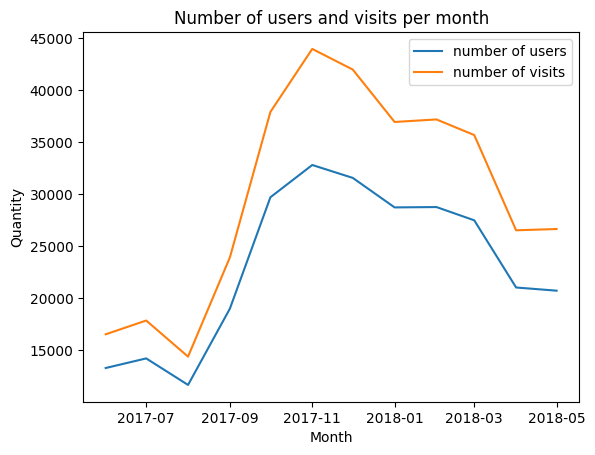

In [11]:
users_month=visits.groupby(['visit_year','visit_month']).agg({'uid':['nunique','count']}).reset_index()
users_month.columns=['visit_year','visit_month','n_users','n_visits']
users_month['date'] = pd.to_datetime(users_month['visit_year'].astype(str) + '-' + users_month['visit_month'].astype(str) + '-01')
users_month = users_month.sort_values('date')
print(users_month)
print(users_month.describe())
sns.lineplot(x= 'date',y='n_users',data= users_month,label='number of users')
sns.lineplot(x='date',y='n_visits',data=users_month,label='number of visits')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Number of users and visits per month')
plt.show()

        visit_year  visit_month   visit_day      n_users     n_visits  \
count        364.0   364.000000  364.000000   364.000000   364.000000   
mean   2017.412088     6.532967   15.760989   907.991758   987.362637   
min         2017.0     1.000000    1.000000     1.000000     1.000000   
25%         2017.0     4.000000    8.000000   594.000000   635.500000   
50%         2017.0     7.000000   16.000000   921.000000  1003.000000   
75%         2018.0    10.000000   23.000000  1173.000000  1280.000000   
max         2018.0    12.000000   31.000000  3319.000000  4042.000000   
std       0.492888     3.454786    8.786448   370.513838   418.994796   

                                date  
count                            364  
mean   2017-11-29 15:57:21.758241792  
min              2017-06-01 00:00:00  
25%              2017-08-30 18:00:00  
50%              2017-11-29 12:00:00  
75%              2018-02-28 06:00:00  
max              2018-05-31 00:00:00  
std                           

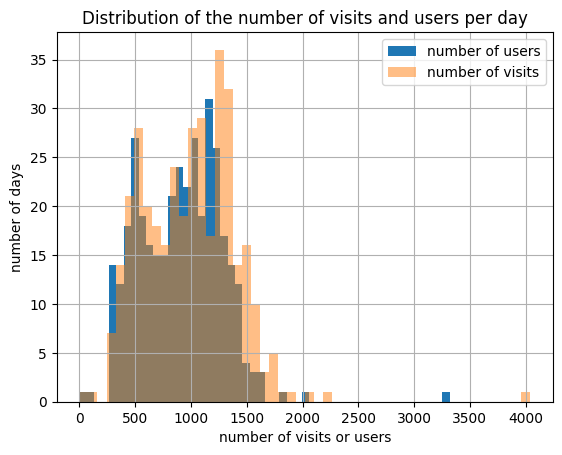


     visit_year  visit_month  visit_day  n_users  n_visits       date
176        2017           11         24     3319      4042 2017-11-24

     visit_year  visit_month  visit_day  n_users  n_visits       date
176        2017           11         24     3319      4042 2017-11-24


In [12]:
users_day=visits.groupby(['visit_year','visit_month','visit_day']).agg({'uid':['nunique','count'] }).reset_index()
users_day.columns=['visit_year','visit_month','visit_day','n_users','n_visits']
users_day['date'] = pd.to_datetime(users_day['visit_year'].astype(str) + '-' + users_day['visit_month'].astype(str) + '-'+users_day['visit_day'].astype(str))
print(users_day.describe())
print(users_day.info())
users_day= users_day.sort_values('date')
#sns.barplot(x='date',y='n_users',data=users_day,label='number of users')
#sns.barplot(x='date',y='n_visits',data=users_day,label='number of users')
users_day['n_users'].hist(bins=50)
users_day['n_visits'].hist(bins=50,alpha=0.5)
plt.xlabel('number of visits or users')
plt.ylabel('number of days')
plt.title('Distribution of the number of visits and users per day')
plt.legend(['number of users','number of visits'])
plt.show()
print()
print(users_day[users_day['n_users']==users_day['n_users'].max()])
print()
print(users_day[users_day['n_visits']==users_day['n_visits'].max()])

  visit_week  n_users  n_visits
0 2017-05-29     2021      2309
1 2017-06-05     4129      4931
2 2017-06-12     2812      3214
3 2017-06-19     2878      3273
4 2017-06-26     3064      3514


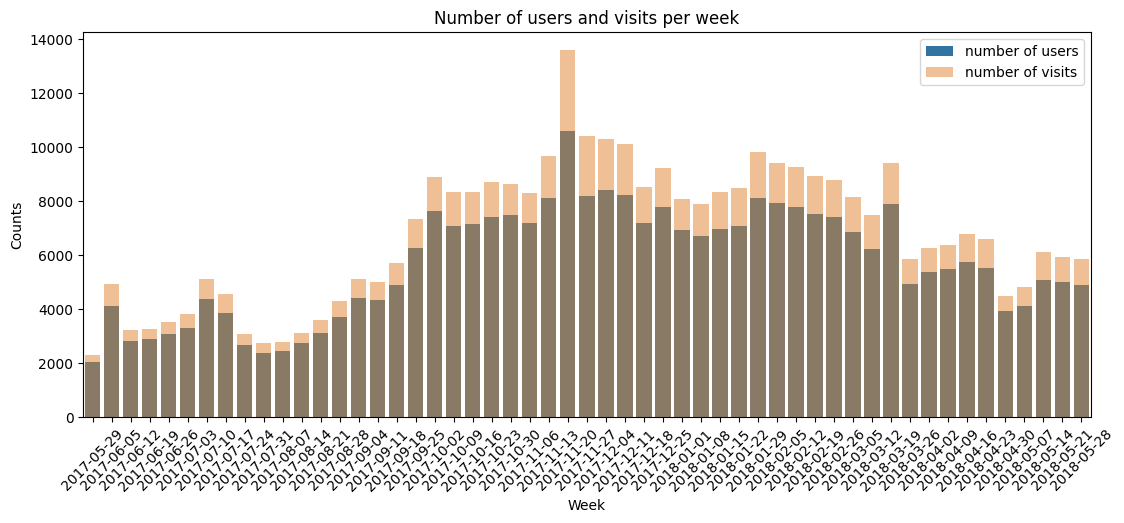

In [13]:
users_week= visits.copy()
users_week['date'] = (users_week['visit_year'].astype(str) + '-' + users_week['visit_month'].astype(str)+'-'+users_week['visit_day'].astype(str))
users_week['date']=pd.to_datetime(users_week['date'])
users_week['day_of_week']= pd.to_timedelta( users_week['date'].dt.dayofweek, unit='D')

users_week['activity_week']=users_week['date']-users_week['day_of_week']
users_week=users_week.groupby(['activity_week']).agg({'uid':['nunique','count']}).reset_index()
users_week.columns=['visit_week','n_users','n_visits']

users_week = users_week.sort_values('visit_week')
print(users_week.head())
plt.figure(figsize=(13,5))
sns.barplot(x='visit_week',y='n_users',data=users_week,label='number of users')
sns.barplot(x='visit_week',y='n_visits',data=users_week,label='number of visits', alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Counts')
plt.title('Number of users and visits per week')
plt.show()

<h4>Conclusion of the Analysis on Number of Users and Visits</h4> 
Estimate: 
<ol>
<li>How many people use the service each day, week, and month?</li> 
    
<p>It was observed that the total number of visits and users decreased from 2017 to 2018. <br>

The highest numbers of visits and users were recorded in the months of October, November, and December 2017, as well as February 2018. <br> 

The week with the highest number of users and visits was the week of 13 November 2017, with nearly 14,000 visits and approximately 10,000 users.<br>

The daily distribution shows that, on average, there are 987 visits and 908 users per day. Daily visits mainly range between 250 and 1,800, though extreme cases reached up to 4,042 visits. The number of daily users ranges approximately between 250 and 1,600, with a peak of 31,319 users. Both the maximum number of visits and users occurred on 24 November 2017, a date likely coinciding with Black Friday or Cyber Monday.</p>

<li>How many sessions are there per day? (A user may have more than one session.)</li> 

<p>It was observed that the number of visits per time period is similar to the number of users. This suggests that most users visit the application only once per day, with a small number returning more than once.<br> 

</ol>


<h2>Session Duration Analysis </h2>

Estimate the average session duration and analyse the distribution of users based on their session length.

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: duration, dtype: float64
count    323604.000000
mean         11.902825
std          17.105824
min           0.316667
25%           2.000000
50%           6.000000
75%          15.000000
max         711.000000
Name: duration, dtype: float64
       duration  n_visits
0      0.316667       868
1      1.000000     53029
2      2.000000     35748
3      3.000000     26672
4      4.000000     21085
..          ...       ...
304  524.000000         1
305  542.000000         1
306  548.000000         1
307  596.000000         1
308  711.000000         1

[309 rows x 2 columns]


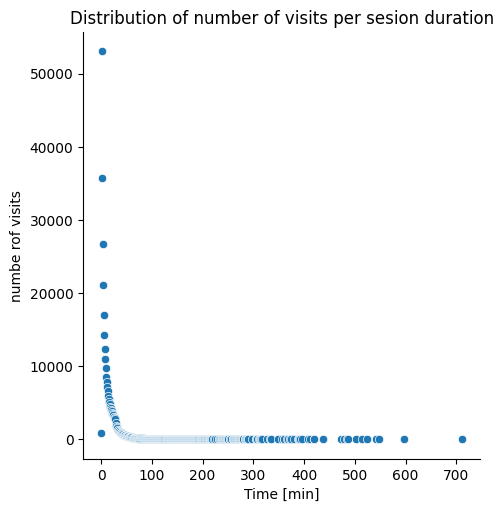

In [14]:
visit_time=visits.copy()
visit_time['duration']=(visit_time['end_ts']-visit_time['start_ts']).dt.total_seconds()/60 #se estima la duración de cada visita
print(visit_time['duration'].describe()) # se observa la distribución de las visitas
visit_time=visit_time[visit_time['duration']>0] #se remueven los datos negativos y las visitas sin duración
visit_time1=visit_time.groupby('duration').agg({'uid':['count']}).reset_index() #se agrupan las visita spor duración
#se estima cuantas visitas tienen cierta duraciónen minutos

visit_time1.columns=['duration','n_visits']

# se estima cual es la duración promedio de visitas por usuario
visit_time2=visit_time.groupby(['uid'])['duration'].mean().reset_index()
visit_time2.columns=['uid','avg_duration']
print(visit_time['duration'].describe())

#Gráfica

sns.relplot(x='duration',y='n_visits',data=visit_time1)
plt.title('Distribution of number of visits per sesion duration')
plt.xlabel('Time [min]')
plt.ylabel('numbe rof visits')
print(visit_time1)

<h4>Conclusion</h4>
<li>What is the duration of each session? </li> 

It was observed that most sessions lasted only a few minutes — less than 6 minutes. The longest session lasted 711 minutes. Many sessions were shorter than one minute. Some data entries contained errors, such as negative session durations. 

<h2> Cohort Analysis </h2>

Users will be grouped into cohorts, and user retention and revenue per cohort will be estimated.
First, the first session date for each user will be identified. Then, users will be grouped into monthly cohorts. After that, the number of visits per cohort per month will be calculated.

In [15]:
#visits.head() #find the start date of each user
start_date=visits.groupby('uid')['start_ts'].min().reset_index()
start_date.columns=['uid','start_time']
start_date.head() 

,uid,start_time
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [16]:
visits2=pd.merge(visits,start_date, on='uid') #add the date of start of each user in the table visits2
visits2.info()
visits2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   device       359400 non-null  object        
 1   end_ts       359400 non-null  datetime64[ns]
 2   source_id    359400 non-null  int64         
 3   start_ts     359400 non-null  datetime64[ns]
 4   uid          359400 non-null  uint64        
 5   visit_day    359400 non-null  int32         
 6   visit_month  359400 non-null  int32         
 7   visit_year   359400 non-null  UInt32        
 8   start_time   359400 non-null  datetime64[ns]
dtypes: UInt32(1), datetime64[ns](3), int32(2), int64(1), object(1), uint64(1)
memory usage: 20.9+ MB


,device,end_ts,source_id,start_ts,uid,visit_day,visit_month,visit_year,start_time
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,12,2017,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2,2018,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,7,2017,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,12,2017,2017-12-27 14:06:00


In [17]:
#agregar el mes de inicio y mes de visita a la tabla visits2
visits2['date'] = pd.to_datetime(visits2['visit_year'].astype(str) + '-' + visits2['visit_month'].astype(str) + '-01')
visits2['date_date']= pd.to_datetime(visits2['visit_year'].astype(str) + '-' + visits2['visit_month'].astype(str) + '-'+visits2['visit_day'].astype(str))
visits2.drop(columns=['visit_day','visit_month','visit_year'], inplace=True)
visits2['start_month']=visits2['start_time'].dt.month
visits2['start_year']=visits2['start_time'].dt.isocalendar().year
visits2['start_date'] = pd.to_datetime(visits2['start_year'].astype(str) + '-' + visits2['start_month'].astype(str) + '-01')
visits2.drop(columns=['start_month','start_year'], inplace=True)
visits2.head()

,device,end_ts,source_id,start_ts,uid,start_time,date,date_date,start_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-01,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-01,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-05-01,2018-05-20,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-01,2017-12-27,2017-12-01


In [18]:
#se agrupan los usuarios por mes de inicio y mes de la sesion y se cuenta el numero de usuarios y el numero de visitas

cohorts= visits2.groupby(['date','start_date']).agg({'uid':'nunique','start_ts':'count'}).reset_index()
cohorts.columns=['visit_month','start_month','n_users','n_visits']
cohorts['life_time']=(((cohorts['visit_month'] - cohorts['start_month']).dt.days)/30).round().astype(int) #visits['start_ts'].dt.isocalendar().week
print(cohorts['life_time'].describe())

count    78.000000
mean      3.666667
std       2.943920
min       0.000000
25%       1.000000
50%       3.000000
75%       6.000000
max      11.000000
Name: life_time, dtype: float64


Text(0.5, 1.0, 'Number of users who visit the website grouped by cohort and month in the life cycle of the cohort')

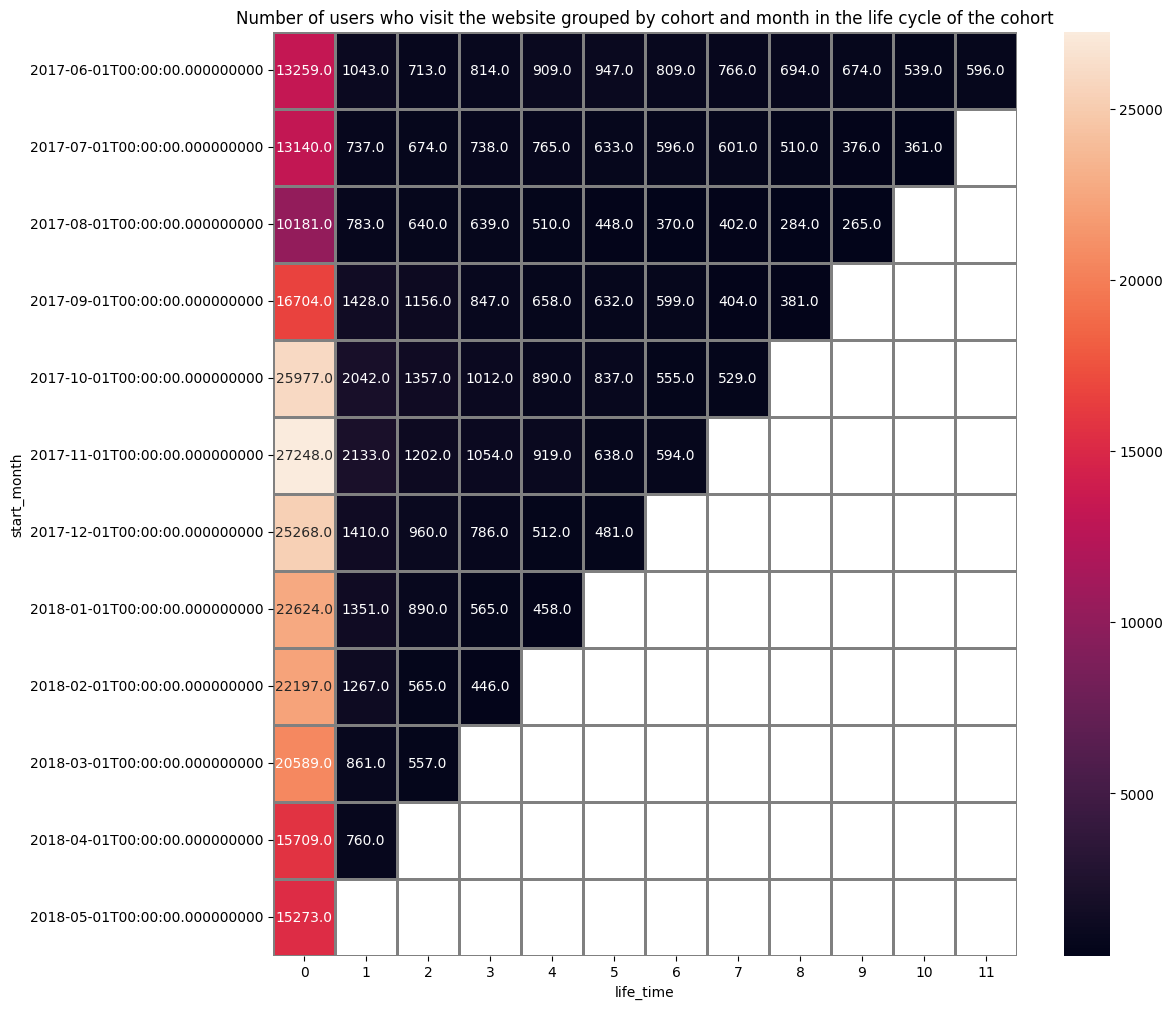

In [19]:
cohorts_users=cohorts.pivot_table(index='start_month',columns='life_time',values='n_users',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(cohorts_users, annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Number of users who visit the website grouped by cohort and month in the life cycle of the cohort')

Text(0.5, 1.0, 'Number of visits on the website grouped by cohort and month in the life cycle of the cohort')

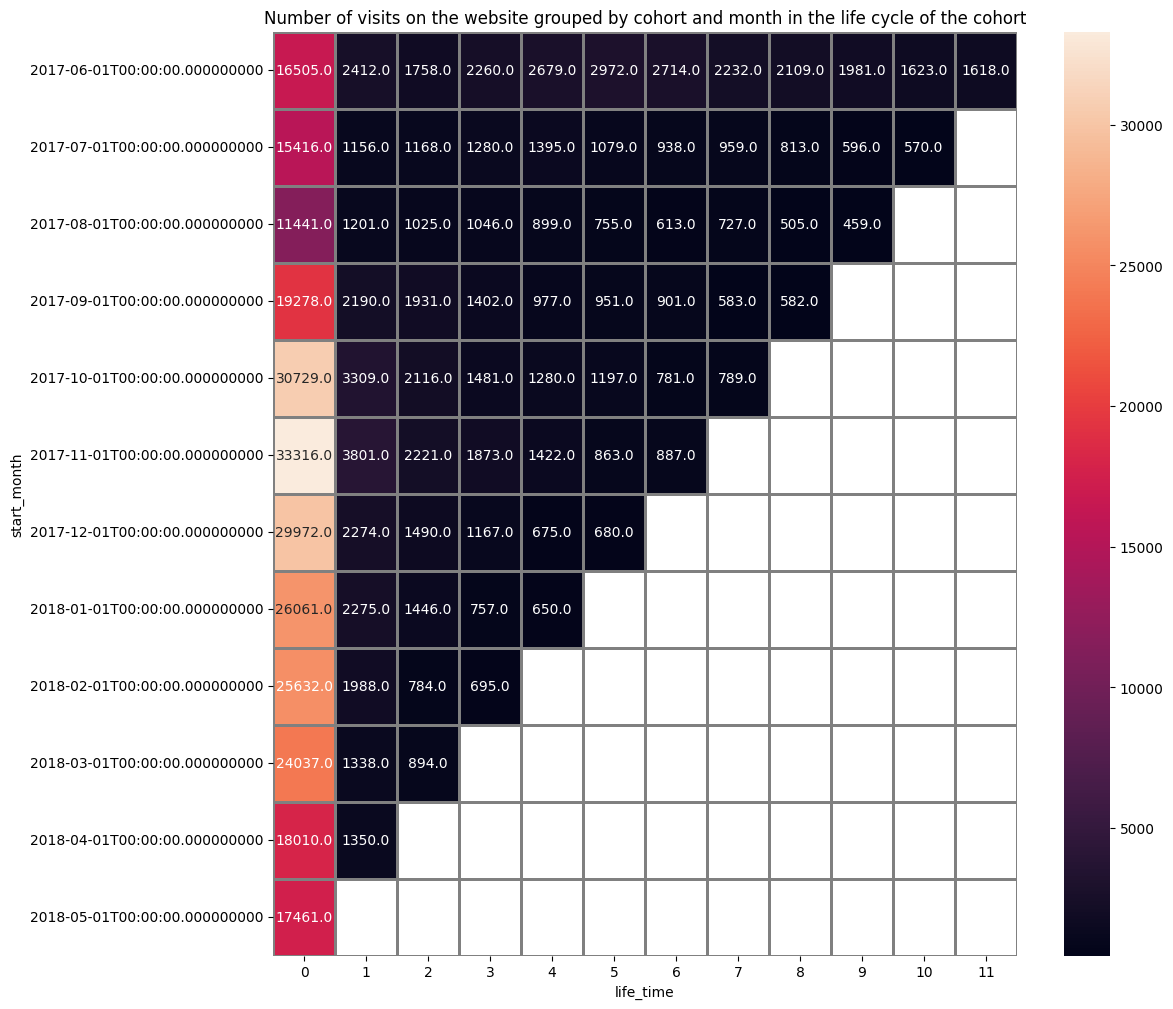

In [20]:
cohorts_visits=cohorts.pivot_table(index='start_month',columns='life_time',values='n_visits',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(cohorts_visits, annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Number of visits on the website grouped by cohort and month in the life cycle of the cohort')

In [21]:
n_users_month=cohorts[cohorts['life_time']==0][['start_month','n_users']]
n_users_month.columns=['start_month','n_new_users']

cohorts=pd.merge(cohorts,n_users_month,on='start_month')
cohorts['retention_rate']=cohorts['n_users']/cohorts['n_new_users']*100
cohorts.head()

,visit_month,start_month,n_users,n_visits,life_time,n_new_users,retention_rate
0,2017-06-01,2017-06-01,13259,16505,0,13259,100.000000
1,2017-07-01,2017-06-01,1043,2412,1,13259,7.866355
2,2017-07-01,2017-07-01,13140,15416,0,13140,100.000000
3,2017-08-01,2017-06-01,713,1758,2,13259,5.377479
4,2017-08-01,2017-07-01,737,1156,1,13140,5.608828


Text(0.5, 1.0, 'Retention percentage of the users per cohort in every month of the cohort life cycle')

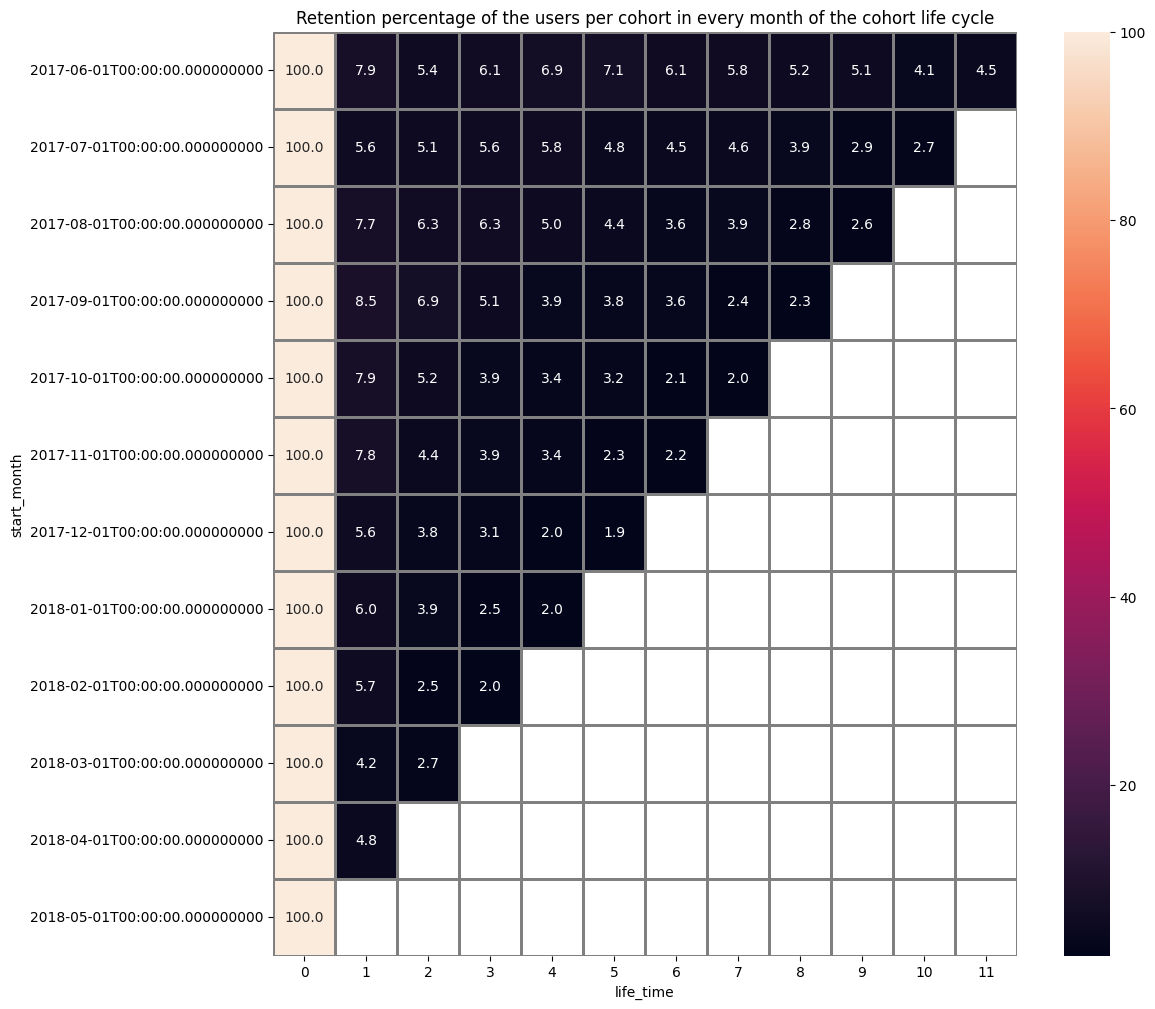

In [22]:
cohorts_retention_users=cohorts.pivot_table(index='start_month',columns='life_time',values='retention_rate',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(cohorts_retention_users, annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Retention percentage of the users per cohort in every month of the cohort life cycle')

<h4>Cohort Analysis Conclusions</h4> 
User retention rates per cohort appear to be quite low and progressively decrease with newer cohorts. However, it is noteworthy that the users who do remain tend to revisit the site several months after their initial visit, often making multiple visits per month.

<h2> Sales Analysis </h2>

In this analysis, the orders table will be examined. It will be grouped by day and by user to estimate the revenue per user per order date. This will then be joined with the start_date table to compare the time elapsed between a user's first visit and their first purchase.

In [23]:
print(orders.head())
print(orders.info())

               buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [24]:
orders['order_month']=orders['buy_ts'].dt.month
orders['order_year']=orders['buy_ts'].dt.isocalendar().year
orders['order_day']=orders['buy_ts'].dt.day
orders['buy_date'] = pd.to_datetime(orders['order_year'].astype(str) + '-' + orders['order_month'].astype(str) + '-'+orders['order_day'].astype(str))
orders.drop(columns=['order_month','order_year','order_day'], inplace=True)
orders.head()

,buy_ts,revenue,uid,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [25]:
order_date=orders.groupby(['uid','buy_date']).agg({'revenue':'sum'}).reset_index()
print(order_date)

                        uid   buy_date  revenue
0           313578113262317 2018-01-03     0.55
1          1575281904278712 2017-06-03     3.05
2          2429014661409475 2017-10-11    73.33
3          2464366381792757 2018-01-28     2.44
4          2551852515556206 2017-11-24    10.99
...                     ...        ...      ...
46543  18445407535914413204 2017-09-24     0.24
46544  18445407535914413204 2017-09-25     0.12
46545  18445601152732270159 2018-03-26     4.22
46546  18446156210226471712 2018-02-18     9.78
46547  18446167067214817906 2017-10-17     7.94

[46548 rows x 3 columns]


In [26]:
first_order_date=order_date.groupby('uid')['buy_date'].min().reset_index()
first_order_date.columns=['uid','first_buy_date']
first_order_date.head()

,uid,first_buy_date
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [27]:
orders2=pd.merge(order_date,first_order_date,on='uid')
orders2.head()

,uid,buy_date,revenue,first_buy_date
0,313578113262317,2018-01-03,0.55,2018-01-03
1,1575281904278712,2017-06-03,3.05,2017-06-03
2,2429014661409475,2017-10-11,73.33,2017-10-11
3,2464366381792757,2018-01-28,2.44,2018-01-28
4,2551852515556206,2017-11-24,10.99,2017-11-24


After identifying the daily revenue per user and the date of each user's first purchase, the orders2 table and the start_date table will be joined using the user field to determine the time between first visit and first purchase.

In [28]:
orders3=pd.merge(orders2,start_date,on='uid')
print('Number of users who visited the website: ',start_date.shape[0])
print()
orders2.info()
print()
orders3.head()
print('The conversion rate from visitors to clients is: ',(orders3['uid'].nunique()/start_date.shape[0])*100)

Number of users who visited the website:  228169

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46548 entries, 0 to 46547
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             46548 non-null  uint64        
 1   buy_date        46548 non-null  datetime64[ns]
 2   revenue         46548 non-null  float64       
 3   first_buy_date  46548 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.4 MB

The conversion rate from visitors to clients is:  16.006994815246596


<h5>Visitor-to-Customer Conversion Rate </h5> By comparing the number of users who visited the website to those who completed a purchase, it is observed that there is a conversion rate of 16%. This indicates that 16% of users who visited the website during the data period went on to make a purchase.

In [29]:
orders3['start_month']=orders3['start_time'].dt.month
orders3['start_year']=orders3['start_time'].dt.isocalendar().year
orders3['start_day']=orders3['start_time'].dt.day
orders3['start_date'] = pd.to_datetime(orders3['start_year'].astype(str) + '-' + orders3['start_month'].astype(str) + '-'+orders3['start_day'].astype(str))
orders3.drop(columns=['start_month','start_year','start_day'], inplace=True)
orders3.head()
orders3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46548 entries, 0 to 46547
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             46548 non-null  uint64        
 1   buy_date        46548 non-null  datetime64[ns]
 2   revenue         46548 non-null  float64       
 3   first_buy_date  46548 non-null  datetime64[ns]
 4   start_time      46548 non-null  datetime64[ns]
 5   start_date      46548 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), uint64(1)
memory usage: 2.1 MB


count    46548.000000
mean        17.829939
std         46.820483
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        363.000000
Name: conversion_time, dtype: float64


Text(0.5, 1.0, 'Distribution of the time taken by users between the first visit to the website and the first purchase')

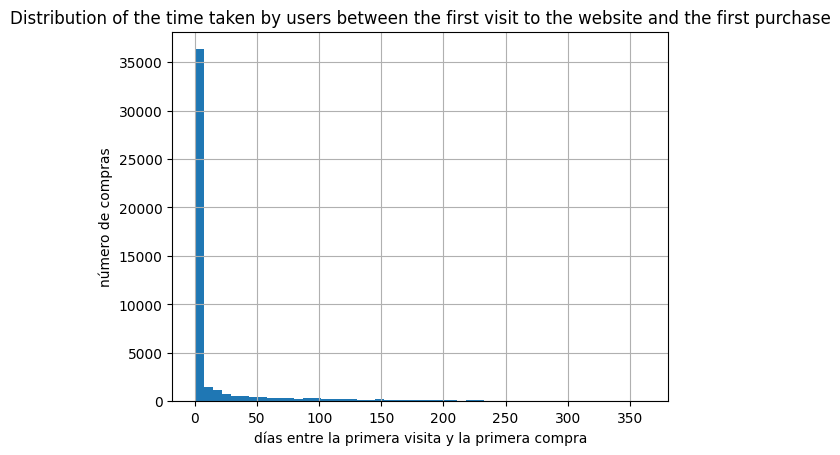

In [30]:
orders3['conversion_time']=((orders3['first_buy_date']-orders3['start_date']).dt.days).astype(int)
orders3['purchasing_time']=((orders3['buy_date']-orders3['first_buy_date']).dt.days).astype(int)
orders3.head()
print(orders3['conversion_time'].describe())
orders3['conversion_time'].hist(bins=50)
plt.xlabel('días entre la primera visita y la primera compra')
plt.ylabel('número de compras')
plt.title('Distribution of the time taken by users between the first visit to the website and the first purchase')

<h5>Time Between First Visit and First Purchase</h5>

It was observed that most users make their first purchase on the same day as their first visit. This suggests that users often know what they want to buy on the website and proceed directly to purchase without much browsing.

In [31]:
orders2.info()
orders2.columns=['uid','date_date','revenue','first_buy_date']
orders4=pd.merge(visits2,orders2,on=['uid','date_date'])
orders4.head()
#print(orders2.info())
print(visits2.info())
print(orders4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46548 entries, 0 to 46547
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             46548 non-null  uint64        
 1   buy_date        46548 non-null  datetime64[ns]
 2   revenue         46548 non-null  float64       
 3   first_buy_date  46548 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   device      359400 non-null  object        
 1   end_ts      359400 non-null  datetime64[ns]
 2   source_id   359400 non-null  int64         
 3   start_ts    359400 non-null  datetime64[ns]
 4   uid         359400 non-null  uint64        
 5   start_time  359400 non-null  datetime64[ns]
 6   dat

    device  n_orders  average_revenue  total_revenue  max_revenue  std_revenue
0  desktop     39109         6.317713      247079.45      4079.17    30.137686
1    touch      8226         4.978835       40955.90       301.58    11.699270


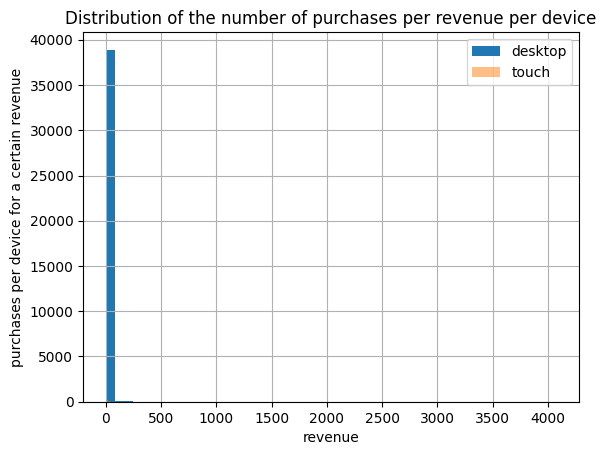

In [32]:
orders_device=orders4.groupby(['device']).agg({'date':'count','revenue':['mean','sum','max','std']}).reset_index()
orders_device.columns=['device','n_orders','average_revenue','total_revenue','max_revenue','std_revenue']
print(orders_device)
orders4[orders4['device']=='desktop']['revenue'].hist(bins=50)
orders4[orders4['device']=='touch']['revenue'].hist(bins=50, alpha=0.5)
plt.xlabel('revenue')
plt.ylabel('purchases per device for a certain revenue')
plt.title('Distribution of the number of purchases per revenue per device')
plt.legend(['desktop','touch'])
plt.show()

In [33]:
visits_device=visits.groupby('device')['start_ts'].count().reset_index()
visits_device.columns=['device','n_visits']
print(visits_device)

    device  n_visits
0  desktop    262567
1    touch     96833


In [34]:
orders_device=pd.merge(orders_device,visits_device,on='device')
print(orders_device)

    device  n_orders  average_revenue  total_revenue  max_revenue  \
0  desktop     39109         6.317713      247079.45      4079.17   
1    touch      8226         4.978835       40955.90       301.58   

   std_revenue  n_visits  
0    30.137686    262567  
1    11.699270     96833  


In [35]:
orders_device['ratio']=(orders_device['n_orders']/orders_device['n_visits'])*100
print(orders_device)

    device  n_orders  average_revenue  total_revenue  max_revenue  \
0  desktop     39109         6.317713      247079.45      4079.17   
1    touch      8226         4.978835       40955.90       301.58   

   std_revenue  n_visits      ratio  
0    30.137686    262567  14.894865  
1    11.699270     96833   8.495038  


<h5>Device Impact on Visits and Sales</h5> 

The purchase rate relative to the number of visits is more than twice as high for desktop users compared to mobile users. Most purchases were made from desktop devices. However, the distribution of revenue by device is similar, with desktop showing slightly higher average revenue. While the device type does not appear to significantly influence purchase value—since average order values fall within the first standard deviation for both device types—there is a noticeable difference in the number of visits and purchases by device.

In [36]:
orders2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46548 entries, 0 to 46547
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             46548 non-null  uint64        
 1   date_date       46548 non-null  datetime64[ns]
 2   revenue         46548 non-null  float64       
 3   first_buy_date  46548 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.4 MB


In [37]:
orders2['start_month']=orders2['first_buy_date'].dt.month
orders2['start_year']=orders2['first_buy_date'].dt.isocalendar().year
orders2['first_buy_month'] = pd.to_datetime(orders2['start_year'].astype(str) + '-' + orders2['start_month'].astype(str) + '-01')
orders2.drop(columns=['start_month','start_year'], inplace=True)
orders2.head()

,uid,date_date,revenue,first_buy_date,first_buy_month
0,313578113262317,2018-01-03,0.55,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,3.05,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11,73.33,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28,2.44,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24,10.99,2017-11-24,2017-11-01


In [38]:
orders2['start_month']=orders2['date_date'].dt.month
orders2['buy_year']=orders2['date_date'].dt.isocalendar().year
orders2['buy_month'] = pd.to_datetime(orders2['buy_year'].astype(str) + '-' + orders2['start_month'].astype(str) + '-01')
orders2.drop(columns=['start_month','buy_year'], inplace=True)
orders2.head()

,uid,date_date,revenue,first_buy_date,first_buy_month,buy_month
0,313578113262317,2018-01-03,0.55,2018-01-03,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03,3.05,2017-06-03,2017-06-01,2017-06-01
2,2429014661409475,2017-10-11,73.33,2017-10-11,2017-10-01,2017-10-01
3,2464366381792757,2018-01-28,2.44,2018-01-28,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24,10.99,2017-11-24,2017-11-01,2017-11-01


In [39]:
orders_month=orders2.groupby(['first_buy_month','buy_month']).agg({'uid':['nunique','count'],'revenue':['sum','mean']}).reset_index()
orders_month.columns=['first_buy_month','buy_month','n_users','n_orders','revenue_total','revenue_avg']
orders_month['life_time']=((((orders_month['buy_month']-orders_month['first_buy_month'])/np.timedelta64(1,'D')))/30).round().astype(int)
orders_month.head()

,first_buy_month,buy_month,n_users,n_orders,revenue_total,revenue_avg,life_time
0,2017-06-01,2017-06-01,2023,2187,9557.49,4.370137,0
1,2017-06-01,2017-07-01,61,138,981.82,7.114638,1
2,2017-06-01,2017-08-01,50,126,885.34,7.026508,2
3,2017-06-01,2017-09-01,54,161,1931.30,11.995652,3
4,2017-06-01,2017-10-01,88,215,2068.58,9.621302,4


In [40]:
orders_month2=orders2.groupby('buy_month').agg({'uid':'count','revenue':['mean','sum']}).reset_index()
orders_month2.columns=['buy_month','n_orders','mean_revenue','total_revenue']
print(orders_month2['n_orders'].describe())
print()      
print(orders_month2['mean_revenue'].describe())
print()      
print(orders_month2['total_revenue'].describe())
#orders_month2.head()

count      13.000000
mean     3580.615385
std      1703.699286
min         1.000000
25%      2188.000000
50%      4027.000000
75%      4863.000000
max      5701.000000
Name: n_orders, dtype: float64

count    13.000000
mean      5.214405
std       0.779609
min       3.420000
25%       5.149238
50%       5.257371
75%       5.731019
max       6.382845
Name: mean_revenue, dtype: float64

count       13.000000
mean     19389.015385
std       9962.071481
min          3.420000
25%      12539.470000
50%      19417.130000
75%      27069.930000
max      36388.600000
Name: total_revenue, dtype: float64


<h5>Average Monthly Purchase Data </h5> On average, there are 3,580 orders per month. The average revenue per order is 5.21 USD, leading to an average total monthly revenue of 19,389 USD. 

Text(0.5, 1.0, 'Revenue per user per cohort through the cohort life cycle')

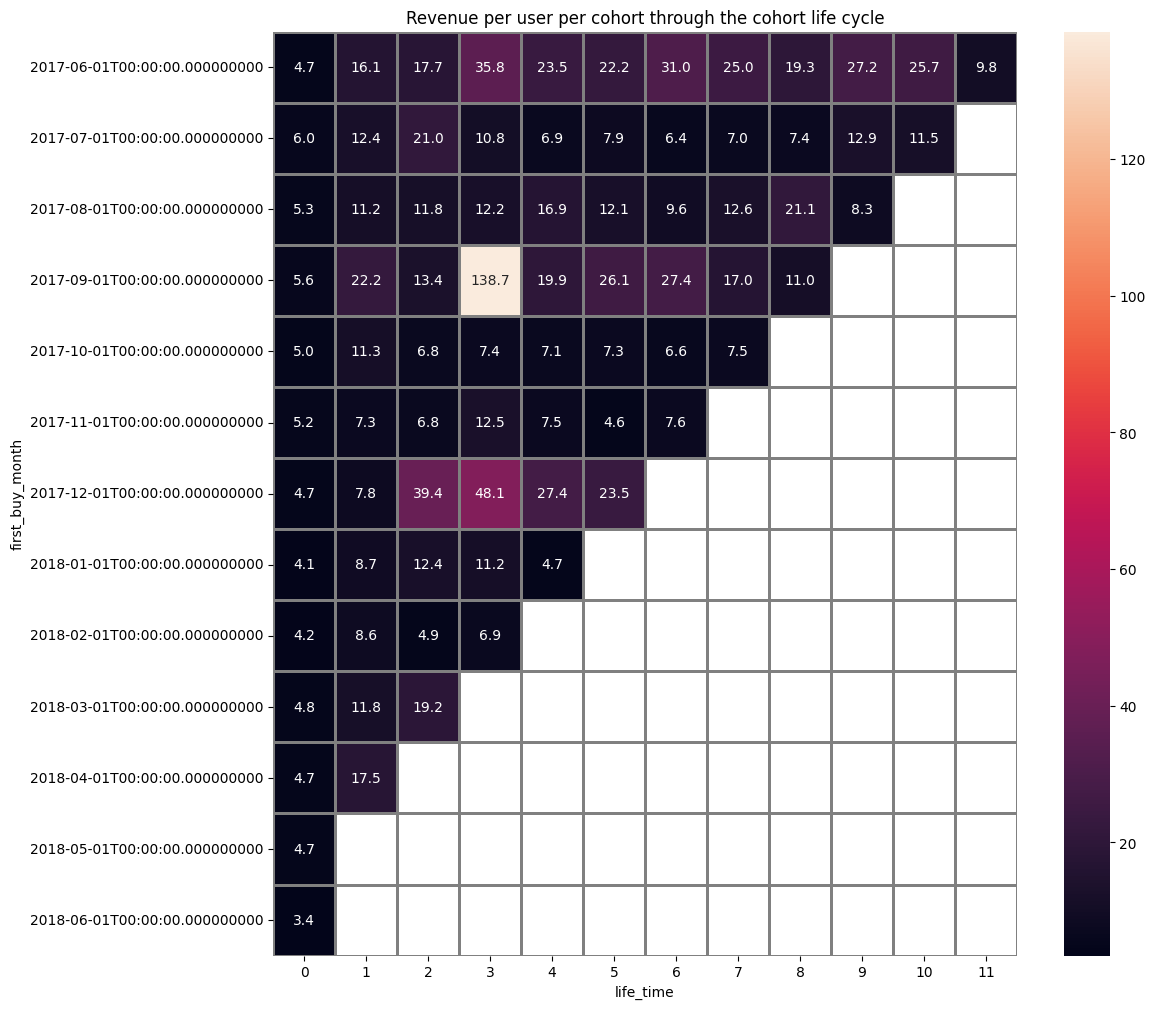

In [41]:
orders_month['revenue_per_user_ltv']=orders_month['revenue_total']/orders_month['n_users']
ltv_table=orders_month.pivot_table(index='first_buy_month',columns='life_time',values='revenue_per_user_ltv',aggfunc='mean').round(2)
ltv_table.fillna('')
plt.figure(figsize=(12,12))
sns.heatmap(ltv_table, annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Revenue per user per cohort through the cohort life cycle')

Text(0.5, 1.0, 'Revenue per cohort through the cohort life cycle')

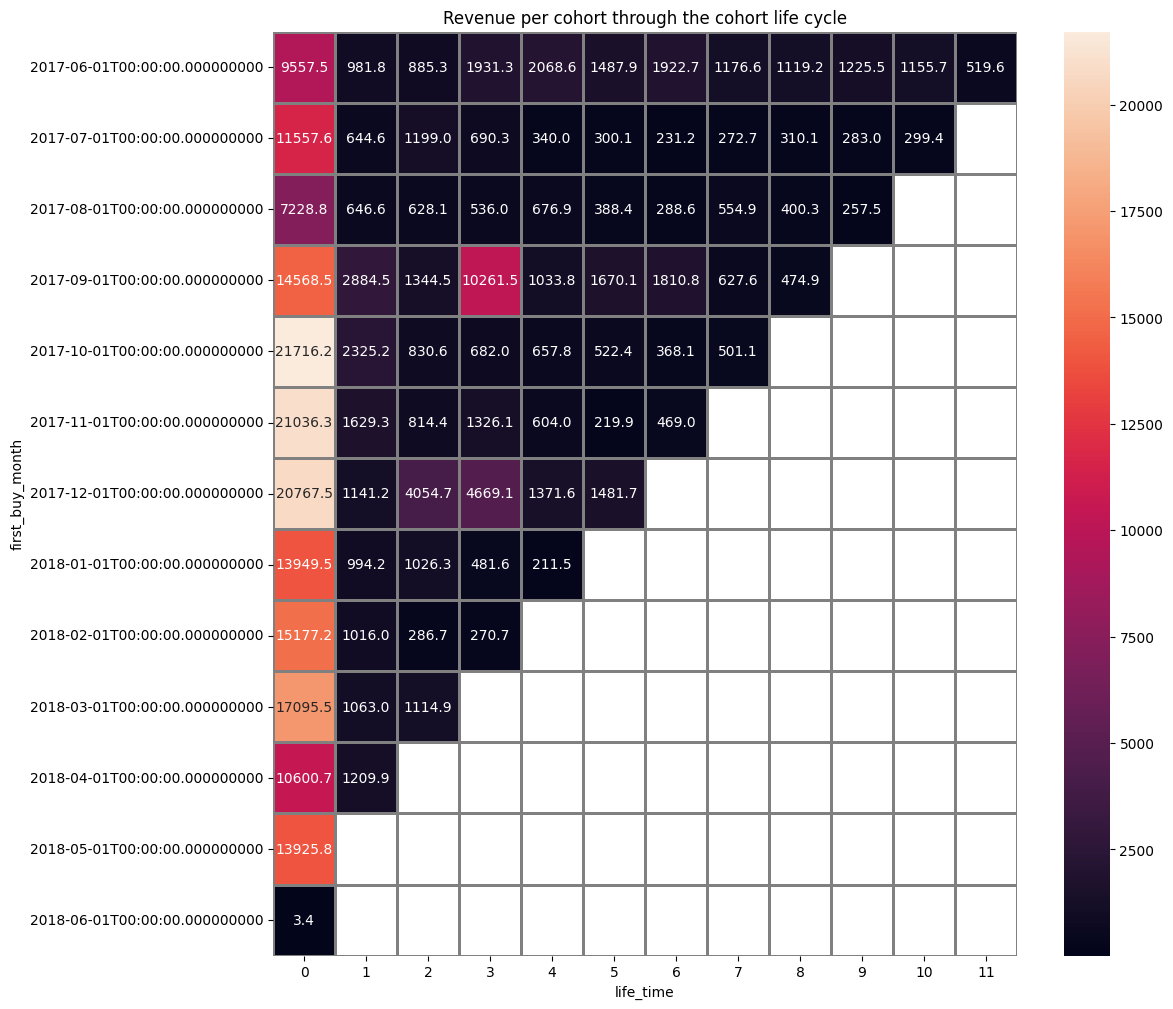

In [42]:
revenue_table=orders_month.pivot_table(index='first_buy_month',columns='life_time',values='revenue_total',aggfunc='mean').round(2)
revenue_table.fillna('')
plt.figure(figsize=(12,12))
sns.heatmap(revenue_table, annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Revenue per cohort through the cohort life cycle')

Text(0.5, 1.0, 'Cumulative revenue per cohort through the cohort life cycle')

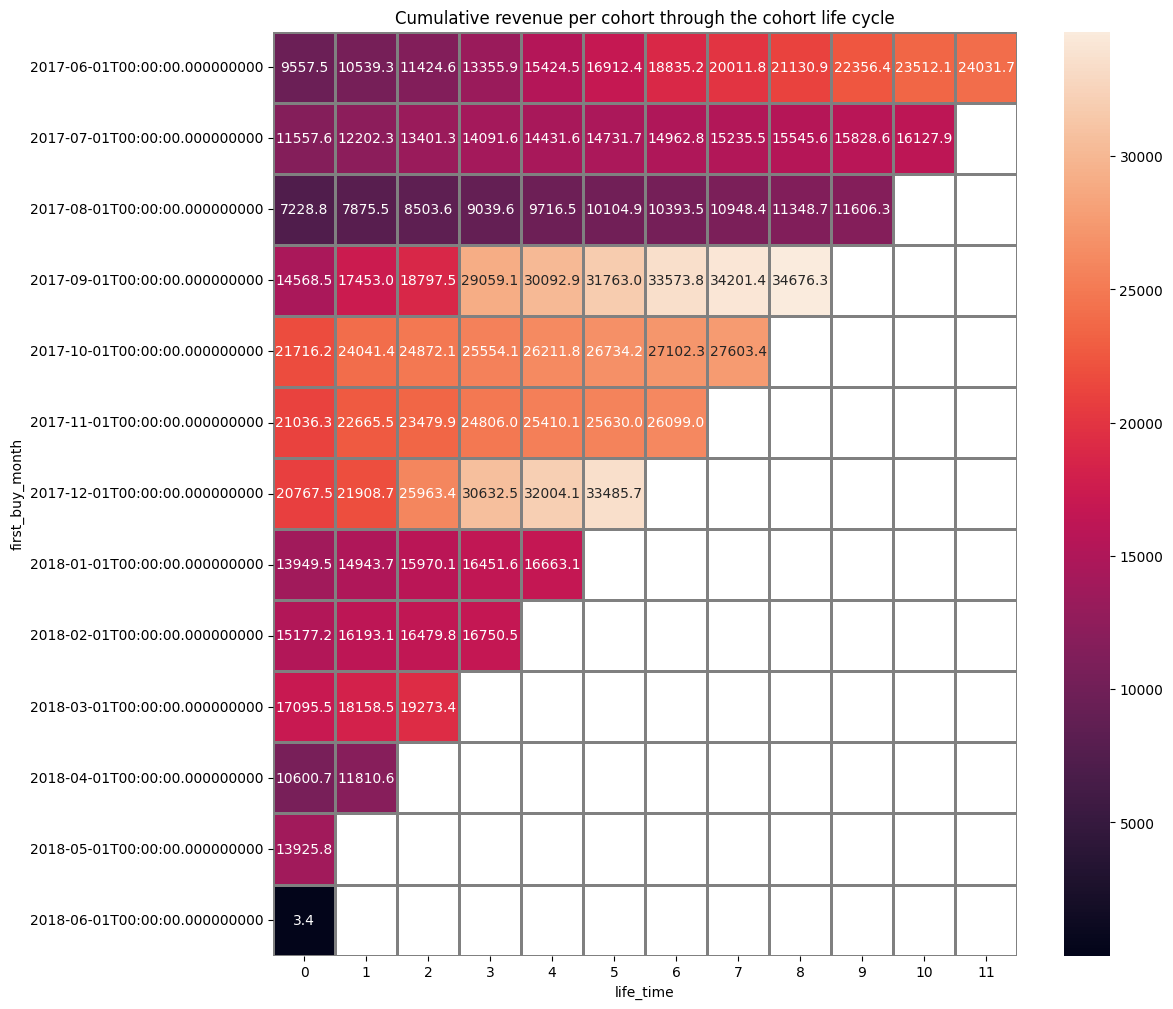

In [43]:
revenue_table_cum=revenue_table.cumsum(axis=1)
plt.figure(figsize=(12,12))
sns.heatmap(revenue_table_cum, annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Cumulative revenue per cohort through the cohort life cycle')

life_time
0      4.801538
1     12.270000
2     15.349000
3     31.511111
4     14.238750
5     14.815714
6     14.770000
7     13.814000
8     14.697500
9     16.133333
10    18.595000
11     9.800000
dtype: float64

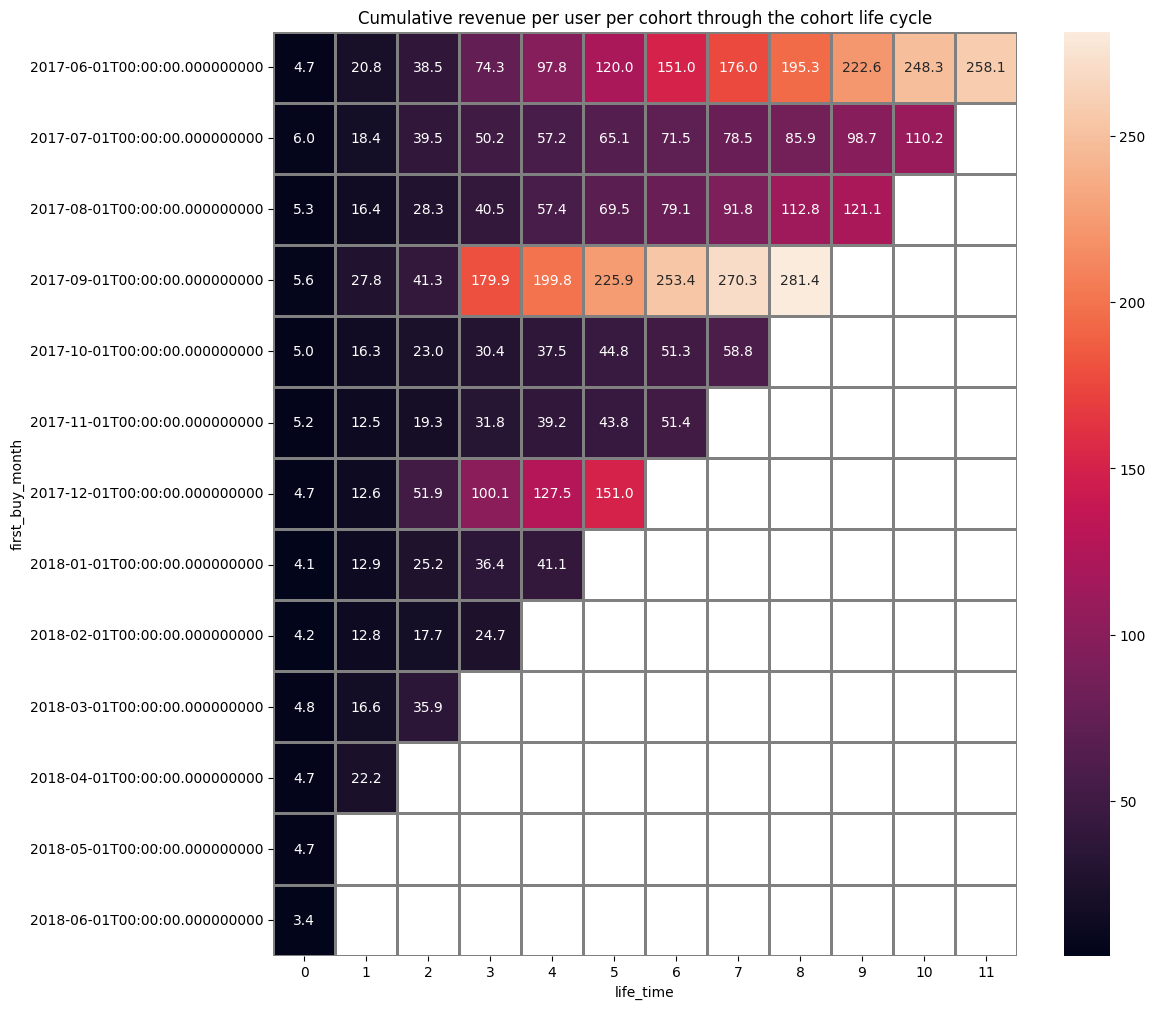

In [44]:
ltv_table_cumsum=ltv_table.cumsum(axis=1)
plt.figure(figsize=(12,12))
sns.heatmap(ltv_table_cumsum, annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Cumulative revenue per user per cohort through the cohort life cycle')
ltv_table.mean()

<h5>Revenue by Cohort and Revenue per User per Cohort (Monthly and Cumulative)</h5>

Although each cohort's first month shows very high revenue, this is due to many users making a single purchase and not returning. In contrast, other users continue making purchases in subsequent months, and these users have significantly higher revenue per user than those who purchase only once. Three cohorts were identified with users who made frequent purchases: June 2017, September 2017, and December 2017.

In [45]:
orders4.head()

,device,end_ts,source_id,start_ts,uid,start_time,date,date_date,start_date,revenue,first_buy_date
0,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018-02-10 12:17:00,2018-02-01,2018-02-12,2018-02-01,0.73,2018-02-12
1,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,2017-09-22 21:16:00,2018-03-01,2018-03-12,2017-09-01,1.83,2018-03-12
2,touch,2018-03-27 17:52:00,5,2018-03-27 17:32:00,15868686231870595097,2018-03-27 16:18:00,2018-03-01,2018-03-27,2018-03-01,1.95,2018-03-27
3,desktop,2017-10-03 10:30:00,1,2017-10-03 10:10:00,18169507838259737849,2017-06-15 15:10:00,2017-10-01,2017-10-03,2017-06-01,2.75,2017-09-29
4,desktop,2018-02-25 23:43:00,5,2018-02-25 23:35:00,9344114199116964256,2018-02-25 23:35:00,2018-02-01,2018-02-25,2018-02-01,0.98,2018-02-25


In [46]:
orders_source_id=orders4.groupby(['source_id','start_date']).agg({'revenue':['sum','mean'],'uid':'nunique'}).reset_index()
orders_source_id.columns=['source_id','start_date','total_revenue','average_revenue','n_users']

print(orders_source_id['source_id'].unique())
orders_source_id.head()

[ 1  2  3  4  5  7  9 10]


,source_id,start_date,total_revenue,average_revenue,n_users
0,1,2017-06-01,19437.51,13.795252,464
1,1,2017-07-01,4183.99,7.909244,390
2,1,2017-08-01,4891.72,13.079465,237
3,1,2017-09-01,4907.37,8.504974,453
4,1,2017-10-01,4878.97,6.083504,641


Text(0.5, 1.0, 'Total income per marketing user source per first cohort month')

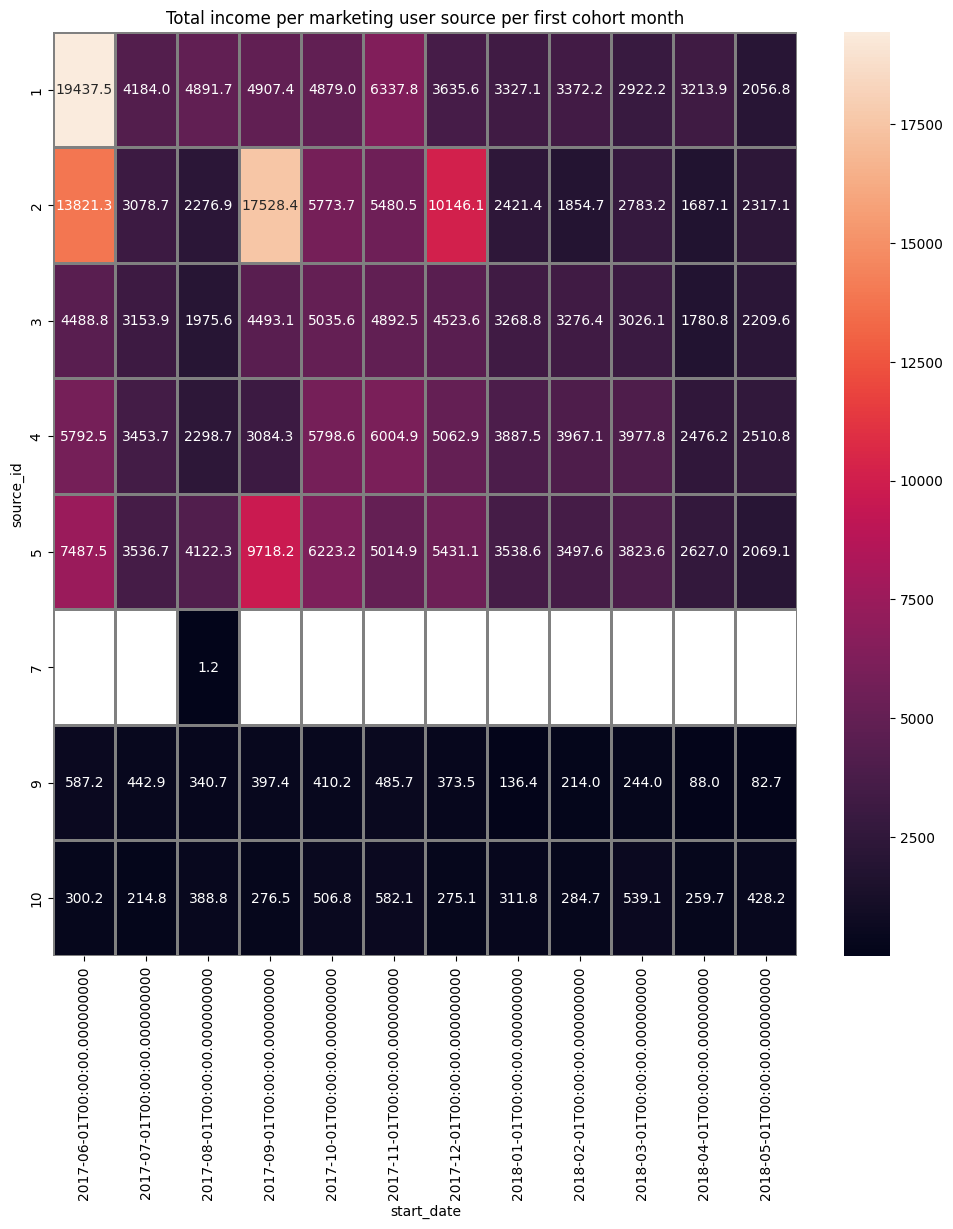

In [67]:
source_total_revenue=orders_source_id.pivot_table(index='source_id',columns='start_date',values='total_revenue',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(source_total_revenue,annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Total income per marketing user source per first cohort month')

Text(0.5, 1.0, 'Number of new users per month per marketing user source')

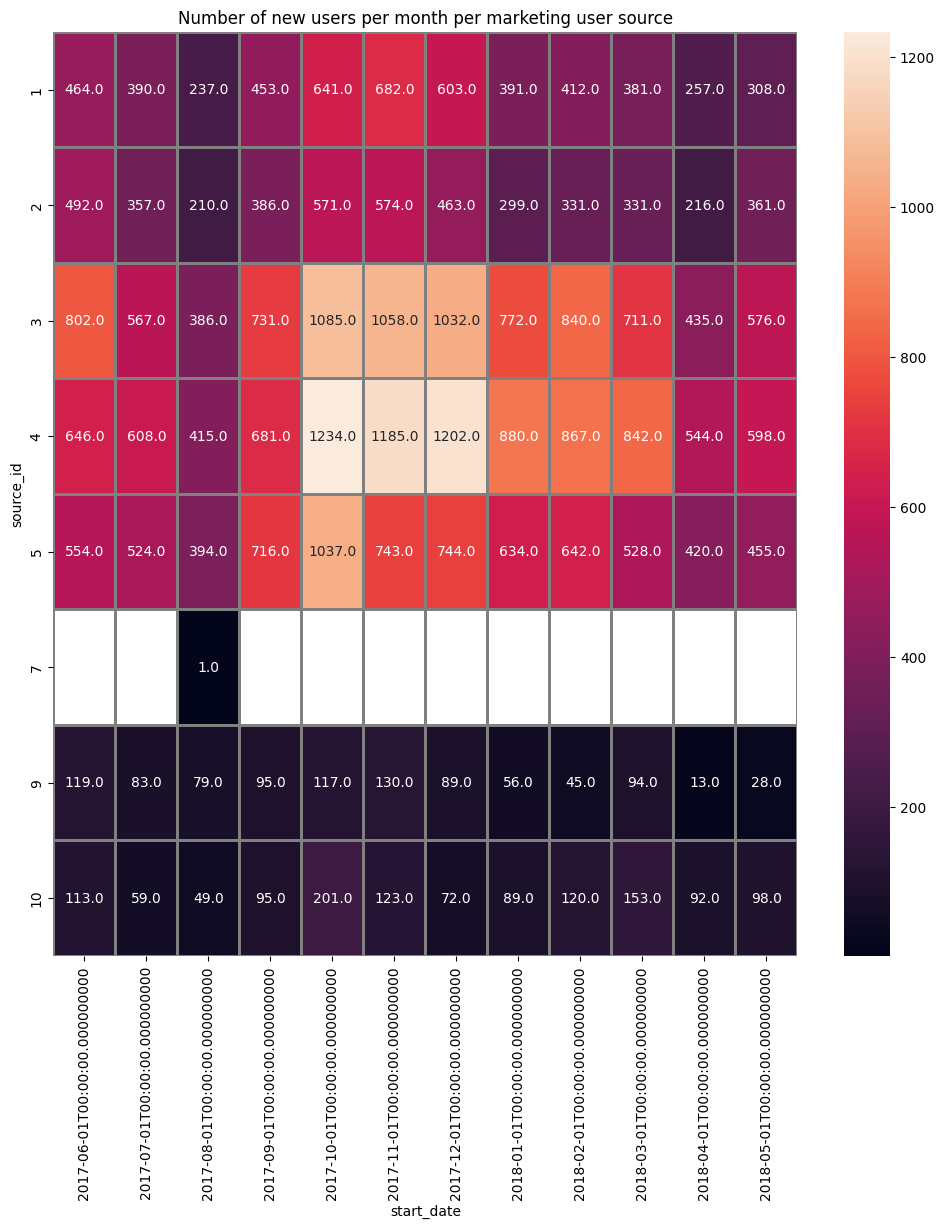

In [68]:
source_new_users=orders_source_id.pivot_table(index='source_id',columns='start_date',values='n_users',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(source_new_users,annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Number of new users per month per marketing user source')

Text(0.5, 1.0, 'Average revenue per purchase per marketing user source per month')

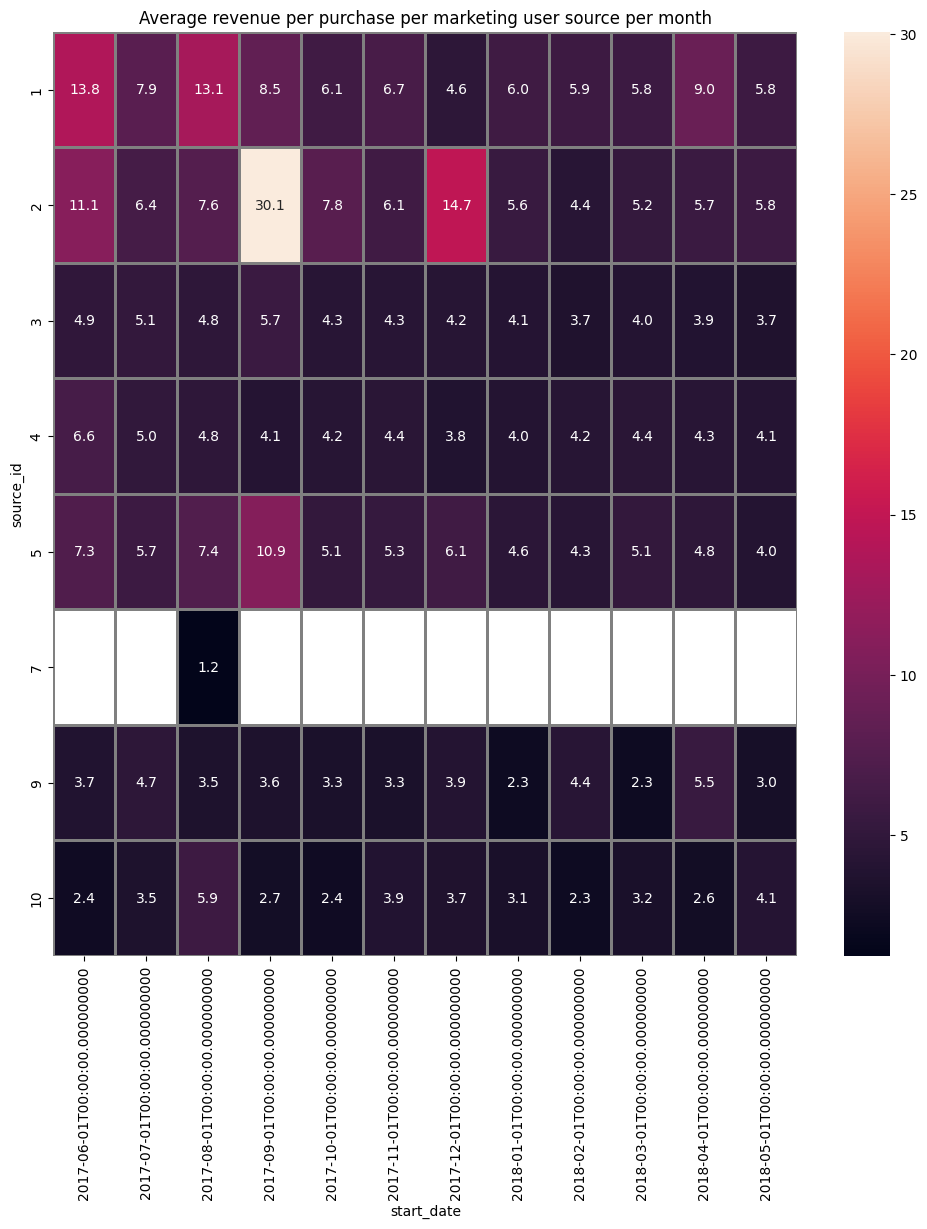

In [69]:
source_avg_revenue=orders_source_id.pivot_table(index='source_id',columns='start_date',values='average_revenue',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(source_avg_revenue,annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Average revenue per purchase per marketing user source per month')

In [50]:
orders_source_id2=orders4.groupby(['source_id','date']).agg({'revenue':['sum','mean'],'uid':'nunique'}).reset_index()
orders_source_id2.columns=['source_id','date','total_revenue','average_revenue','n_users']
orders_source_id2.head()

,source_id,date,total_revenue,average_revenue,n_users
0,1,2017-06-01,2294.58,6.500227,277
1,1,2017-07-01,3015.15,8.422207,290
2,1,2017-08-01,1970.02,7.635736,197
3,1,2017-09-01,3963.68,8.089143,381
4,1,2017-10-01,5861.35,7.612143,597


Text(0.5, 1.0, 'Total revenue per marketing user source per month')

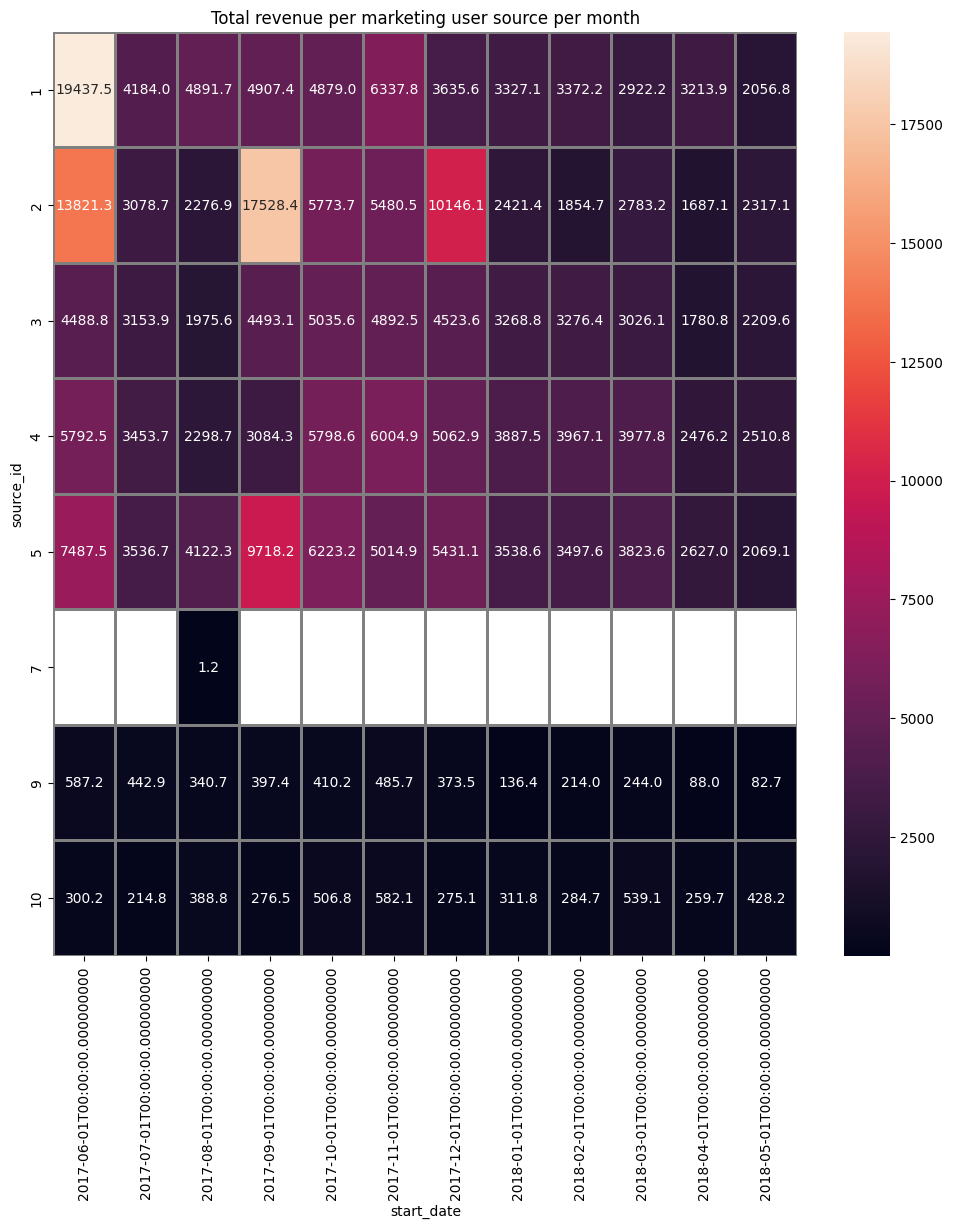

In [70]:
source_total_revenue2=orders_source_id2.pivot_table(index='source_id',columns='date',values='total_revenue',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(source_total_revenue,annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Total revenue per marketing user source per month')

In [52]:
source_device=orders4.groupby(['source_id','device']).agg({'uid':'nunique','revenue':'sum'})
print(source_device)

                    uid   revenue
source_id device                 
1         desktop  4120  53496.24
          touch    1132   9668.90
2         desktop  3593  60513.18
          touch    1061   8655.97
3         desktop  7714  36502.03
          touch    1347   5622.72
4         desktop  7735  38151.87
          touch    2032  10163.04
5         desktop  6320  51619.18
          touch    1099   5470.50
7         desktop     1      1.22
9         desktop   804   3233.73
          touch     154    569.08
10        desktop  1020   3562.00
          touch     250    805.69


<h5>Análisis por fuente de primera visita </h5>
Se observa que los usuarios que llegaron con las fuentes 1 , 2 y 5 dejaron más ingresos que los usuarios que llegaron con las demás fuentes y que sus compras tienen un ingreso por compra más alto. Se observa, que las fuentes 3, 4 y 5 dejaron más usuarios nuevos, sin embargo, estos usuarios no generaron tantos ingresos. Finalmente las fuentes 7, 9 y 10 no generaron muchas compras ni muchas visitas. Se observa que la diferencia de eficiencia de las fuentes no está relacionada con el dispositivo utilizado ya que todas las fuentes fueron utilizadas en ambos dispositivos y el comportamiento de las fuentes es similar en ambos dispositivos.

<h4>Sales Analysis Conclusions:</h4>

<li>When do people start buying? (In KPI analysis, we are generally interested in knowing the time between user registration and conversion — that is, when a user becomes a customer. For instance, if registration and the first purchase occur on the same day, the user would fall under the “Conversion 0d” category. If the purchase occurs the next day, it would be “Conversion 1d.” You can use any approach that allows you to compare conversions across different cohorts to determine which cohort or marketing channel is more effective.)</li>

It was observed that most customers made their first purchase on the same day as their first visit. Approximately 25% of users waited more than four days after their first visit before making their first purchase.

<li>How many orders are placed within a given time period?</li>

On average, 3,580 orders are placed per month.

<li>What is the average purchase size?</li>

The average revenue per order is $5.21 USD, and the average monthly revenue is approximately $19,389 USD. 

<li>How much revenue do customers generate? (LTV)</li>

Revenue per user in the first month of each cohort tends to be low. However, it increases in the following months. Users who remain loyal to the platform tend to generate higher long-term revenue per user. Nevertheless, most users in each cohort make a purchase only in the first month and do not return afterwards.


<li> It was also observed that desktop computers are the preferred device for making purchases. There is a significant difference in both visits and purchases across device types. In addition to receiving fewer visits, mobile devices also have a lower conversion rate from visits to purchases compared to desktops.</li>

<h2>Marketing Analysis</h2>

 An analysis will be conducted on the monthly cost of each traffic source, the monthly user acquisition cost, and the profitability of each source (ROMI).

In [71]:
costs.head(15)

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
5,1,2017-06-06,40.39,2017-06-01
6,1,2017-06-07,40.59,2017-06-01
7,1,2017-06-08,56.63,2017-06-01
8,1,2017-06-09,40.16,2017-06-01
9,1,2017-06-10,43.24,2017-06-01


In [72]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   source_id   2542 non-null   int64         
 1   dt          2542 non-null   datetime64[ns]
 2   costs       2542 non-null   float64       
 3   cost_month  2542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


In [73]:
costs['year']=costs['dt'].dt.isocalendar().year
costs['month']=costs['dt'].dt.month
costs['cost_month']= pd.to_datetime(costs['year'].astype(str) + '-' +costs['month'].astype(str) + '-01')
costs.drop(columns=['month','year'], inplace=True)
costs.head()

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [56]:
costs_month=costs.groupby(['source_id','cost_month']).agg({'costs':['sum']}).reset_index()
costs_month.columns=['source_id','date','cost_month']
costs_month.head()

,source_id,date,cost_month
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


Text(0.5, 1.0, 'Total cost per marketing user source per month')

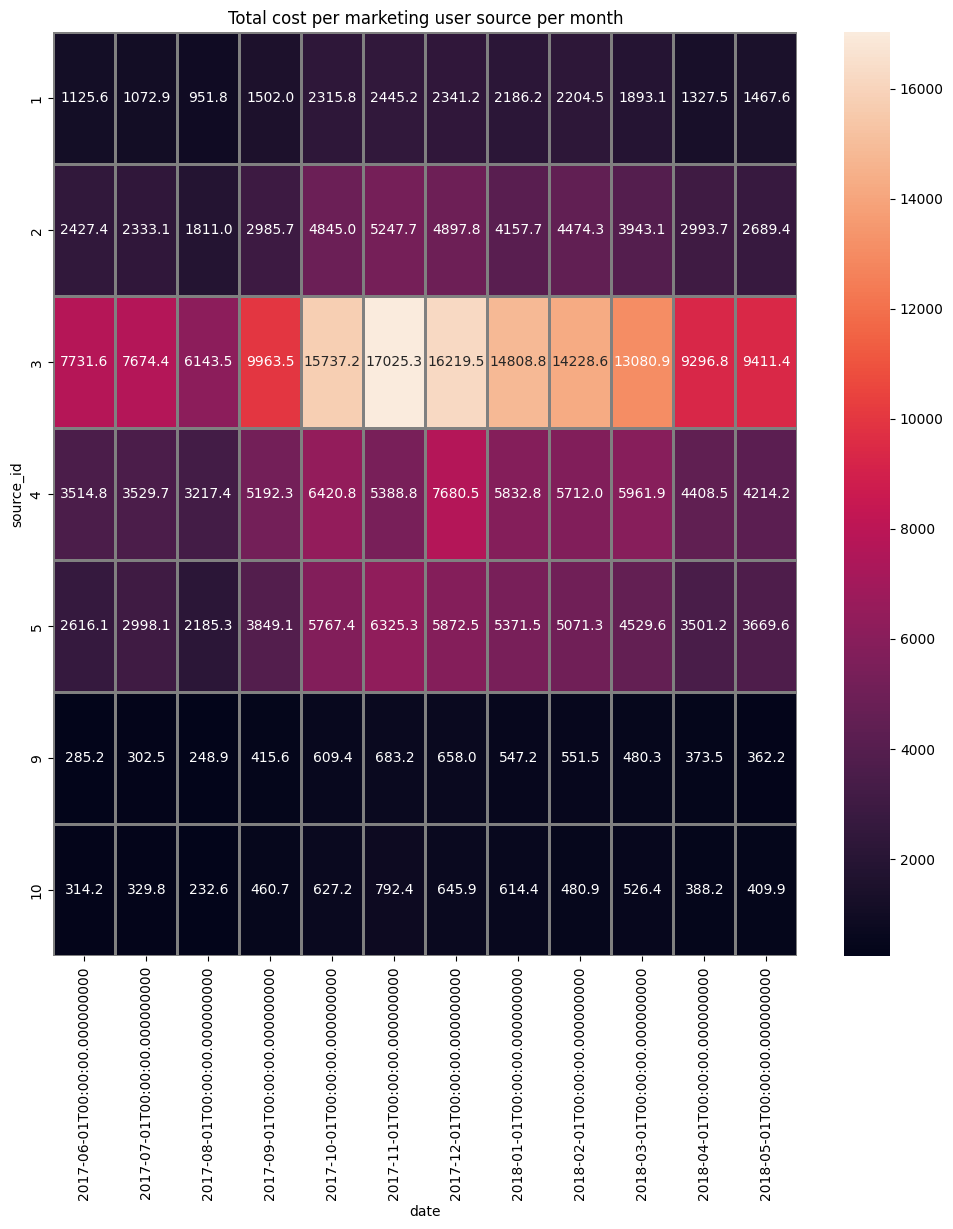

In [74]:
costs_table=costs_month.pivot_table(index='source_id',columns='date',values='cost_month',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(costs_table,annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Total cost per marketing user source per month')

In [58]:
costs_marketing=pd.merge(costs_month,orders_source_id2, on=['source_id','date'])
costs_marketing.head(15)

,source_id,date,cost_month,total_revenue,average_revenue,n_users
0,1,2017-06-01,1125.61,2294.58,6.500227,277
1,1,2017-07-01,1072.88,3015.15,8.422207,290
2,1,2017-08-01,951.81,1970.02,7.635736,197
3,1,2017-09-01,1502.01,3963.68,8.089143,381
4,1,2017-10-01,2315.75,5861.35,7.612143,597
5,1,2017-11-01,2445.16,8503.53,8.419337,720
6,1,2017-12-01,2341.20,7750.31,7.583474,740
7,1,2018-01-01,2186.18,4172.39,6.055718,503
8,1,2018-02-01,2204.48,4797.46,6.119209,536
9,1,2018-03-01,1893.09,9066.96,10.871655,576


In [59]:
costs_marketing['cac']=costs_marketing['cost_month']/costs_marketing['n_users']
costs_marketing['romi']=costs_marketing['total_revenue']/costs_marketing['cost_month']
costs_marketing.head()

,source_id,date,cost_month,total_revenue,average_revenue,n_users,cac,romi
0,1,2017-06-01,1125.61,2294.58,6.500227,277,4.063574,2.038521
1,1,2017-07-01,1072.88,3015.15,8.422207,290,3.699586,2.810333
2,1,2017-08-01,951.81,1970.02,7.635736,197,4.831523,2.069762
3,1,2017-09-01,1502.01,3963.68,8.089143,381,3.942283,2.638917
4,1,2017-10-01,2315.75,5861.35,7.612143,597,3.878978,2.531081


Text(0.5, 1.0, 'Client acquisition cost per marketing user source per month')

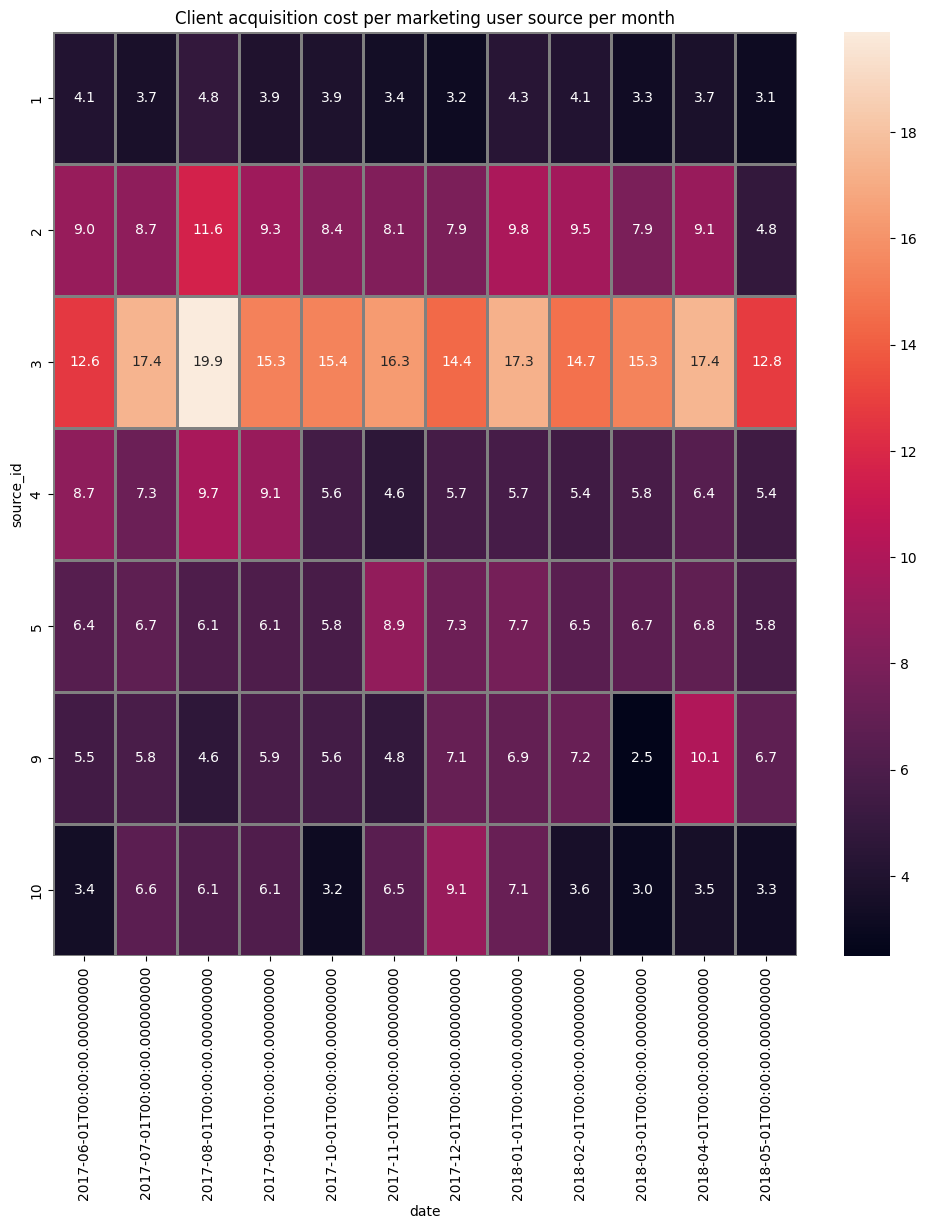

In [75]:
cac_table=costs_marketing.pivot_table(index='source_id',columns='date',values='cac',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(cac_table,annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Client acquisition cost per marketing user source per month')

Text(0.5, 1.0, 'Monthly Marketing Return on Investment (ROI) by Source')

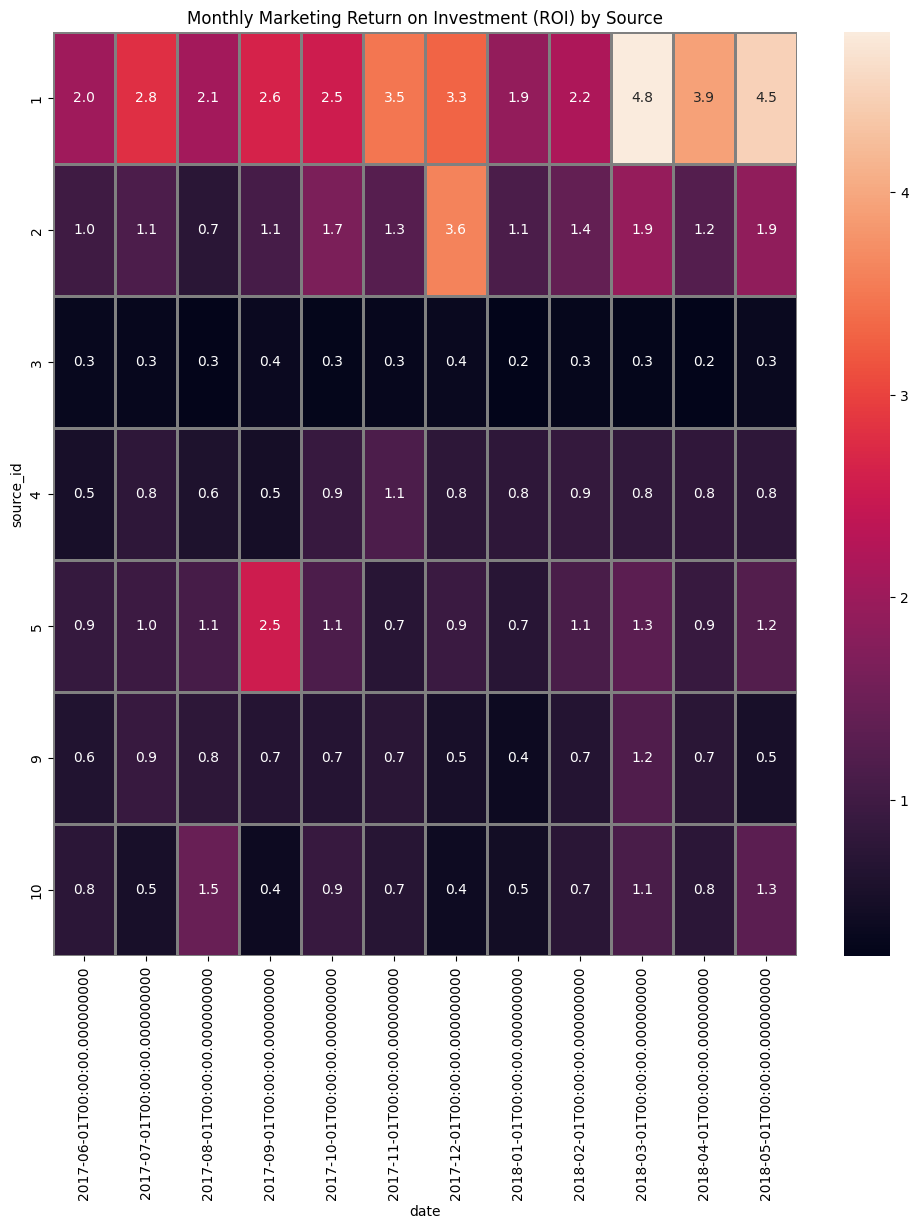

In [76]:
romi_table=costs_marketing.pivot_table(index='source_id',columns='date',values='romi',aggfunc='mean')
plt.figure(figsize=(12,12))
sns.heatmap(romi_table,annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Monthly Marketing Return on Investment (ROI) by Source')

In [62]:
costs_month_sum=costs_month.groupby('date')['cost_month'].sum().reset_index()
costs_month_sum.columns=['first_buy_month','mark_costs']
print(costs_month_sum)

   first_buy_month  mark_costs
0       2017-06-01    18015.00
1       2017-07-01    18240.59
2       2017-08-01    14790.54
3       2017-09-01    24368.91
4       2017-10-01    36322.88
5       2017-11-01    37907.88
6       2017-12-01    38315.35
7       2018-01-01    33518.52
8       2018-02-01    32723.03
9       2018-03-01    30415.27
10      2018-04-01    22289.38
11      2018-05-01    22224.27


In [63]:
revenue_table_cum.reset_index()
revenue_table_cum.columns=['lt_0','lt_1','lt_2','lt_3','lt_4','lt_5','lt_6','lt_7','lt_8','lt_9','lt_10','lt_11']
print(revenue_table_cum)

                     lt_0      lt_1      lt_2      lt_3      lt_4      lt_5  \
first_buy_month                                                               
2017-06-01        9557.49  10539.31  11424.65  13355.95  15424.53  16912.45   
2017-07-01       11557.65  12202.26  13401.31  14091.62  14431.59  14731.67   
2017-08-01        7228.83   7875.46   8503.58   9039.63   9716.48  10104.93   
2017-09-01       14568.53  17453.02  18797.54  29059.06  30092.90  31762.98   
2017-10-01       21716.20  24041.41  24872.06  25554.07  26211.84  26734.21   
2017-11-01       21036.26  22665.53  23479.92  24806.05  25410.09  25629.97   
2017-12-01       20767.49  21908.71  25963.41  30632.51  32004.08  33485.74   
2018-01-01       13949.50  14943.72  15970.06  16451.65  16663.13       NaN   
2018-02-01       15177.16  16193.14  16479.80  16750.50       NaN       NaN   
2018-03-01       17095.49  18158.54  19273.41       NaN       NaN       NaN   
2018-04-01       10600.69  11810.61       NaN       

In [64]:
ROMI2=pd.merge(costs_month_sum,revenue_table_cum,on='first_buy_month').reset_index()
print(ROMI2)
ROMI2.info()

    index first_buy_month  mark_costs      lt_0      lt_1      lt_2      lt_3  \
0       0      2017-06-01    18015.00   9557.49  10539.31  11424.65  13355.95   
1       1      2017-07-01    18240.59  11557.65  12202.26  13401.31  14091.62   
2       2      2017-08-01    14790.54   7228.83   7875.46   8503.58   9039.63   
3       3      2017-09-01    24368.91  14568.53  17453.02  18797.54  29059.06   
4       4      2017-10-01    36322.88  21716.20  24041.41  24872.06  25554.07   
5       5      2017-11-01    37907.88  21036.26  22665.53  23479.92  24806.05   
6       6      2017-12-01    38315.35  20767.49  21908.71  25963.41  30632.51   
7       7      2018-01-01    33518.52  13949.50  14943.72  15970.06  16451.65   
8       8      2018-02-01    32723.03  15177.16  16193.14  16479.80  16750.50   
9       9      2018-03-01    30415.27  17095.49  18158.54  19273.41       NaN   
10     10      2018-04-01    22289.38  10600.69  11810.61       NaN       NaN   
11     11      2018-05-01   

In [65]:
ROMI3= ROMI2.drop(columns=['first_buy_month']).div(ROMI2['mark_costs'], axis=0)
ROMI3['month']=ROMI2['first_buy_month']
ROMI3.drop(columns=['mark_costs','index'],inplace=True)
ROMI3.set_index('month',inplace=True)
print(ROMI3)

                lt_0      lt_1      lt_2      lt_3      lt_4      lt_5  \
month                                                                    
2017-06-01  0.530530  0.585030  0.634174  0.741379  0.856205  0.938798   
2017-07-01  0.633623  0.668962  0.734697  0.772542  0.791180  0.807631   
2017-08-01  0.488747  0.532466  0.574934  0.611176  0.656939  0.683202   
2017-09-01  0.597833  0.716200  0.771374  1.192464  1.234889  1.303422   
2017-10-01  0.597866  0.661881  0.684749  0.703525  0.721634  0.736016   
2017-11-01  0.554931  0.597911  0.619394  0.654377  0.670312  0.676112   
2017-12-01  0.542015  0.571800  0.677624  0.799484  0.835281  0.873951   
2018-01-01  0.416173  0.445835  0.476455  0.490823  0.497132       NaN   
2018-02-01  0.463807  0.494855  0.503615  0.511887       NaN       NaN   
2018-03-01  0.562069  0.597021  0.633675       NaN       NaN       NaN   
2018-04-01  0.475594  0.529876       NaN       NaN       NaN       NaN   
2018-05-01  0.626601       NaN       N

Text(0.5, 1.0, 'Porcentaje de recuperación de la inversión en Marketing por tiempo de vida de cohortes')

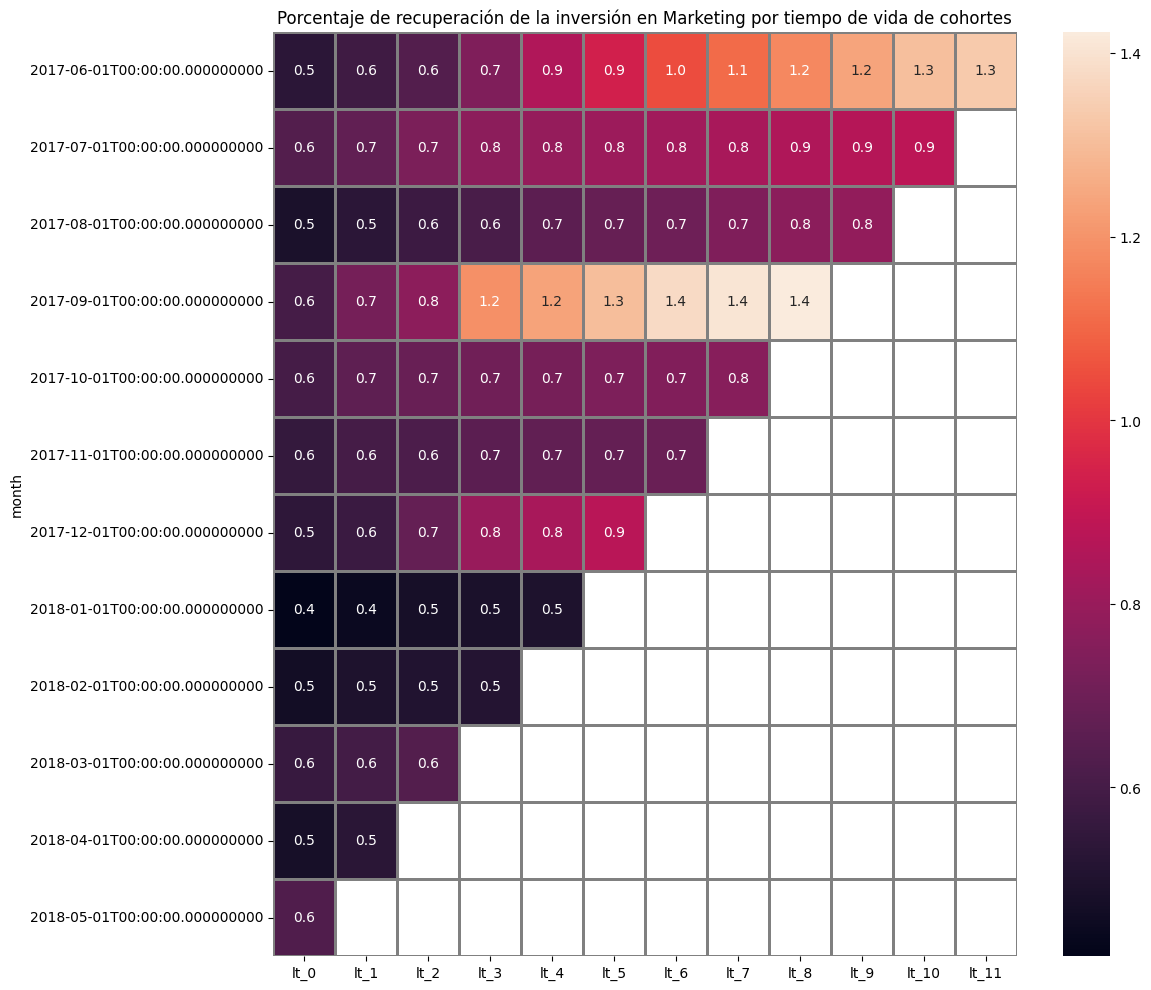

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(ROMI3,annot=True, fmt='.1f', linewidths=1,linecolor='gray')
plt.title('Monthly Marketing Return on Investment (ROI) by Source')

<h4>Marketing Analysis Conclusions </h4>

The data show that while Sources 3 and 4 attract a large number of customers, the cost of acquiring paying customers through these sources is very high—exceeding even the average revenue per purchase. As a result, the Return on Marketing Investment (ROMI) for these sources remains below 1.

In contrast, Sources 1 and 2 are the most effective at attracting customers who convert to purchases and demonstrate a ROMI greater than 1.

Sources 3, 4, 5, 9, and 10 appear to be ineffective at acquiring high-value customers and fail to offset their marketing costs, making them unprofitable from a marketing perspective.

<h2>Final Conclusions</h2>

Objectives:

<li>Identify how customers use the service</li>

The analysis revealed two main customer behaviours. Most users visit the website only once and do not return.
A smaller segment of customers continues to return in the following months. Additionally, most customers who make a purchase do so on the same day as their first visit.

The highest customer activity was observed in November 2017.

<li>Estimate when customers begin purchasing</li>

Customers tend to make their first purchase on the same day they visit the website for the first time.

<li>Calculate how much revenue each customer contributes to the company</li>

Customers who visit only once spend an average of 4.80 USD In contrast, returning customers contribute approximately 14 USD on average.

<li>Estimate when revenues offset customer acquisition costs</li>

Since only a small proportion of users continue purchasing, monthly marketing costs are nearly covered by the revenue generated from users who purchase within that same month.
Only Sources 1 and 2 generate enough revenue to exceed marketing costs and show some profit.
The remaining sources have high Customer Acquisition Costs (CAC), and their revenues do not cover marketing expenses.
Even when analysing cumulative revenue per cohort over the cohort’s lifetime, many cohorts fail to offset marketing costs several months after acquisition.

